
## FIFA 2019 

![alt text](headerfifa19.jpg)



The project is part of the Advanced Data Analysis Nanodegree Program by Udacity a scholarship by (Egypt FWD) Future work is a digital initiative powered by Information Technology Industry Development Agency (ITIDA) to upskill Web, Data and Digital marketing tech skills for jobs of the future, to equip and train 100,000 young Egyptians for digital technologies and skills to remote work and local market opportunities.





#### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#explore">Data Exploration</a></li>
<li><a href="#Dashboard">Project Dashboard</a></li>
<li><a href="#skillwage">Research Question 1: What is the effect of players skills rate on wages?</a></li>
<li><a href="#bestclub">Research Question 2: Is there a dominant team which has the best combinations of players?</a></li>
<li><a href="#segment">Research Question 3: What is the best segmentation based on hierarchy of clubs and players?</a></li>
<li><a href="#wage_predicaton">Research Question 4: What is the predict wage per player considering all variables in the dataset? How accurate is the predication ?</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>


<a id='intro'></a>

## Introduction

The FIFA 2019 dataset includes information about almost 18K players from more than 160 distinct nationalities and distributed over more than 600 football clubs from around the world, for each player in the dataset there are +80 features describing the characterstics of the players like nationality, age, physical characterstics, wages, position on the pitch, skills and performance measures.


Will be tackling the project by firstly clean and wrangle the data, then will be moving to basic exploration univariate and multivariate, then build a user friendly dashboard for audience convenience,after that will be performing dimensionality reduction, doing hypothesis testing, drawing statistical ineference and applying supervised and unsupervised machine learning models to cluster and segment the football clubs and players and will predict players wages with linear regression 




In [1]:
! pip install missingno
! pip install --upgrade scikit-learn
! pip install --upgrade pandas
! pip install --upgrade statsmodels

! pip install --upgrade matplotlib
! pip install --upgrade seaborn

    100% |████████████████████████████████| 20.0MB 1.8MB/s eta 0:00:01   34% |███████████                     | 6.9MB 28.6MB/s eta 0:00:01    54% |█████████████████▌              | 11.0MB 28.9MB/s eta 0:00:01    61% |███████████████████▊            | 12.3MB 27.5MB/s eta 0:00:01    68% |█████████████████████▉          | 13.6MB 27.2MB/s eta 0:00:01    74% |████████████████████████        | 14.9MB 27.6MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.5MB/s eta 0:00:01  4% |█▌                              | 624kB 24.3MB/s eta 0:00:01    14% |████▌                           | 1.9MB 25.9MB/s eta 0:00:01    32% |██████████▌                     | 4.4MB 25.2MB/s eta 0:00:01    60% |███████████████████▎            | 8.1MB 24.6MB/s eta 0:00:01    78% |█████████████████████████       | 10.5MB 23.3MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
    

    9% |███▏                            | 4.9MB 29.2MB/s eta 0:00:02

    12% |████                            | 6.3MB 27.1MB/s eta 0:00:02

    23% |███████▌                        | 11.5MB 24.9MB/s eta 0:00:02

    25% |████████▎                       | 12.7MB 26.9MB/s eta 0:00:02

    100% |████████████████████████████████| 49.4MB 765kB/s eta 0:00:01    38% |████████████▏                   | 18.8MB 26.3MB/s eta 0:00:02    40% |█████████████                   | 20.0MB 25.7MB/s eta 0:00:02    43% |█████████████▊                  | 21.2MB 26.4MB/s eta 0:00:02    45% |██████████████▌                 | 22.4MB 25.2MB/s eta 0:00:02    50% |████████████████                | 24.8MB 25.7MB/s eta 0:00:01    54% |█████████████████▋              | 27.1MB 25.2MB/s eta 0:00:01    61% |███████████████████▉            | 30.6MB 23.9MB/s eta 0:00:01    75% |████████████████████████▏       | 37.2MB 23.4MB/s eta 0:00:01    84% |███████████████████████████     | 41.5MB 23.4MB/s eta 0:00:01    86% |███████████████████████████▋    | 42.6MB 22.9MB/s eta 0:00:01    88% |████████████████████████████▎   | 43.6MB 25.8MB/s eta 0:00:01    90% |█████████████████████████████   | 44.8MB 21.3MB/s eta 0:00:01    92% |█████████████████████████████▊  | 45.8MB 18.5MB/s eta 0:00:01    94% |███████████

In [2]:
# Import libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime as dt

# Impute rest of missing values using KNN imputier 
from sklearn.impute import KNNImputer

# Dashboard visiualization
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage, AnnotationBbox)

# Stats models for linear regression
import statsmodels.api as sm

# Clustering Algorithm
from sklearn.cluster import KMeans

# Linear regression sklearn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



In [3]:
# Reading the dataset
df =pd.read_csv('data.csv')

In [4]:
# Reading the first rows of the data
pd.set_option("display.max_columns", 89)
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')


df.head(5)  

Number of rows: 18207
Number of columns: 89


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


<a id='clean'></a>
## Data Cleaning

### Observations

1. Change columns names ---> convert to lower case, remove spaces and add underscores
2. Drop cols [Photo, Flag, Club Logo] ---> as they contain urls for photos
3. Cols [value, wage, Release Clasue] ---> to be adjusted from currency string to floats
4. Column [Weight] ---> change from bound to Kg and remove string 'lbs'
5. Column [Height] ---> change from inch to cm and remove string '
6. Adjust columns of player postion ratings 
7. Rearrange columns of df2 in order ---> (qualtative, quantative and target variables)
8. Checking and handling missing values
    1. Imputing rows with all data missing
    2. Treating columns "Loaned" which has the highest `Nans`
    3. Dealing with missing contracts dates
    4. Build machine learning clustering algorithem `KNN` to impute missing data from players postions rating columns

In [5]:
# Change columns names
cols_names = [x.lower().strip().replace(' ','_') for x in list(df.columns)]
df.columns = cols_names

In [6]:
# Drop unnecessary columns ['unnamed:_0', 'photo', 'flag', 'club_logo']
df.drop(['unnamed:_0', 'photo', 'flag', 'club_logo'], axis=1, inplace=True)

In [7]:
# Build function to convert currency string to decimal value

def currency_to_decimal(s):

    """
    Function to convert currency string to decimal value
    the function takes (s) input and converted to amount in decimals
    """
    
    str_length = len(s)
    dott_location = s.find(".")
    
 
    if dott_location < 0:
        dott_location = 0
        
    k_zeros = 3
    m_zeros = 6
    
    if dott_location == 0:
        decimal_after_dot = 0
    else:
        decimal_after_dot = str_length  - dott_location - 2
    
    end_with_k = k_zeros - decimal_after_dot
    end_with_m = m_zeros - decimal_after_dot
    


    if s[-1] == 'M':
        s1 = s[1:-1].replace('.', '') + (end_with_m * "0")
    else:
        s1 = s[1:-1].replace('.', '') + (end_with_k * "0")

    
    return s1



In [8]:
# Apply function currency_to_decimal to cols ['value', 'wage', 'release_clause']
currency_cols = ['value', 'wage', 'release_clause']

for i in currency_cols:
    df[f'{i}_new'] = df[i].fillna('0')
    df[f'{i}_new'] = df[f'{i}_new'].apply(currency_to_decimal)

In [9]:
# Create new variable, Covert column weight from bound to Kg
bound_to_kg =  0.45359237
df['weight_kg'] = df['weight'].fillna('1111').apply(lambda x: x[:-3]).astype('float') * bound_to_kg

# Impute missing values and assign it to mean weight
df['weight_kg'] = df['weight_kg'].replace(bound_to_kg, df['weight_kg'].mean())

In [10]:
# Create new variable, Covert column height from feet to cm
feet_to_cm = 30.48 
df['height_cm'] = df['height'].replace("[\']", '.', regex=True).astype(float) * feet_to_cm

In [11]:
# Specify the columns of players postions 
positions_list = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 
                  'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

# Create new dataframe container for operation on players postions
df_positions = pd.DataFrame()

# Adjust the players postions by removing the the + sign after rating
for i in positions_list:
    df_positions[i] = df[i].fillna('111').apply(lambda x: x[:-2])

In [12]:
# Create list of columns to drop
cols_to_drop = ['value', 'wage', 'release_clause', 'weight', 'height', 'ls', 'st',
                'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
                'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

# Create new dataframe and remove the unnecessary parameters
df2 = df.drop(cols_to_drop, axis = 1)

# Append df_positions to new dataframe df2

df2 = pd.concat([df2, df_positions], axis = 1)

In [13]:
df2.head()

,id,name,age,nationality,overall,potential,club,special,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,position,jersey_number,joined,loaned_from,contract_valid_until,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,value_new,wage_new,release_clause_new,weight_kg,height_cm,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110500000,565000,226500000,72.121187,173.7360,88,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,61,61,64,59,47,47,47,59
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77000000,405000,127100000,83.007404,188.9760,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118500000,290000,228100000,68.038855,179.8320,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60
3,193080,De Gea,27,Spain,91,93,Manchester United,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72000000,260000,138600000,76.203518,195.0720,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102000000,355000,196400000,69.853225,155.7528,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73


In [14]:
# Rearrange columns of df2

cols_arranged = [
        # Qualtative (Categorical) Variable 
       'id', 'name', 'nationality', 'club',
       'special', 'preferred_foot', 'work_rate', 'body_type', 'real_face', 'position',
       'jersey_number', 'joined', 'loaned_from', 'contract_valid_until',
 
       # Quantative Variable 
       'weight_kg', 'height_cm',
       'age', 'overall', 'potential','international_reputation', 'weak_foot', 
       'skill_moves', 'crossing', 'finishing', 'headingaccuracy', 'shortpassing', 'volleys',
       'dribbling', 'curve', 'fkaccuracy', 'longpassing', 'ballcontrol',
       'acceleration', 'sprintspeed', 'agility', 'reactions', 'balance',
       'shotpower', 'jumping', 'stamina', 'strength', 'longshots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standingtackle', 'slidingtackle', 'gkdiving',
       'gkhandling', 'gkkicking', 'gkpositioning', 'gkreflexes', 
    
       'ls', 'st','rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
       'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb','rcb', 'rb',
    
    
       # Target Variable 
       'wage_new', 'release_clause_new', 'value_new']

In [15]:
# put the dataframe df2 in order
df2 = df2[cols_arranged].copy()

In [16]:
# Restore missing values in positions list
df2[positions_list] = df2[positions_list].astype('float').replace(1.0, np.nan)
df2.fillna(np.nan, inplace=True)

In [17]:
# Missing values
pd.set_option("display.max_rows", 100)
df2.isnull().sum().sort_values(ascending = False) 

loaned_from                 16943
lw                           2085
cm                           2085
ls                           2085
st                           2085
rs                           2085
lf                           2085
cf                           2085
rf                           2085
rw                           2085
cam                          2085
ram                          2085
lm                           2085
lcm                          2085
lam                          2085
rcm                          2085
rwb                          2085
rm                           2085
rcb                          2085
cb                           2085
lcb                          2085
lb                           2085
rb                           2085
rdm                          2085
lwb                          2085
cdm                          2085
ldm                          2085
joined                       1553
contract_valid_until          289
club          

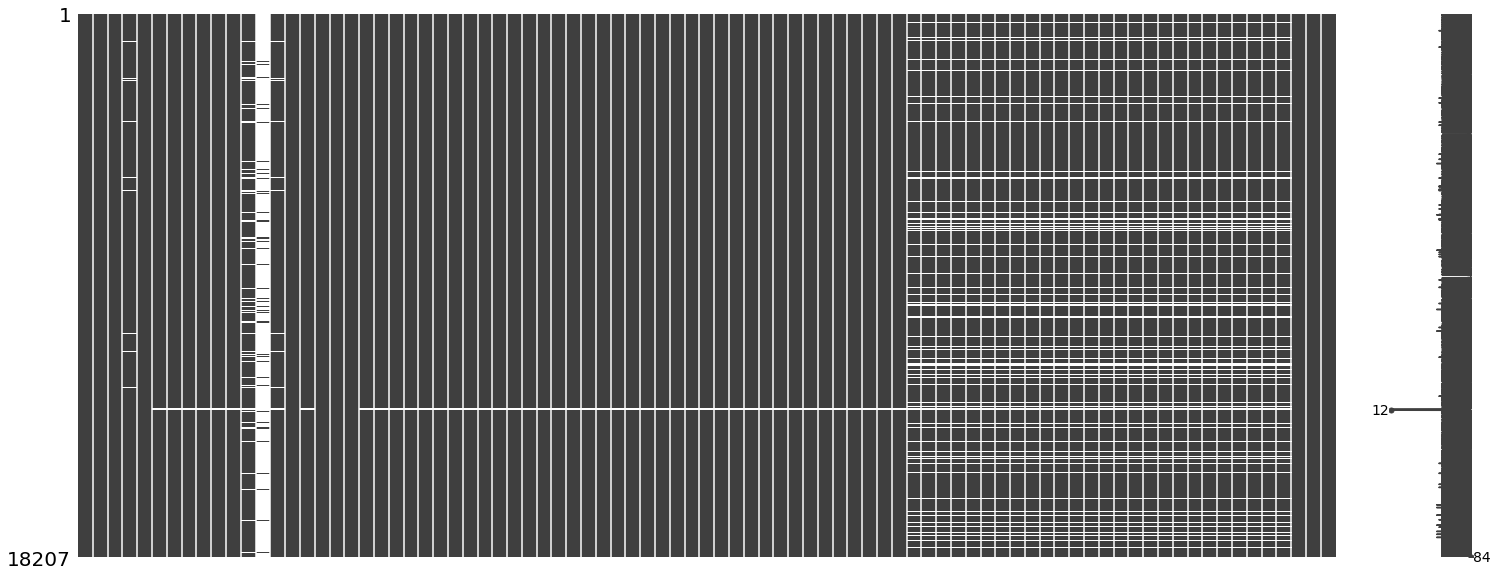

In [18]:
# Visualizing missing values
msno.matrix(df2);

In [19]:
# Checking the cols with the least amount of Nans
index_missing = df2[df2['jumping'].isnull()].index

# Dropping missing values identified from above
df2.drop(index_missing, inplace = True)

In [20]:
# Investigating & Dealing wit column "loaned_from" for reason of missing values
df2['loaned_from'].value_counts()

"""
The data values of the column are for the club name 
where a player is loaned temporarily to, so we will transform 
the column to a binary column where it we define if a player is loaned or not
"""
# Create new varaible "loaned"
df2['loaned'] = df2['loaned_from'].apply(lambda x: 0 if pd.isnull(x) else 1)

# Drop variable "loaned_from"
df2.drop('loaned_from', axis=1, inplace = True)

In [21]:
# Investigating & Dealing wit column "contract_valid_until" for reason of missing values
index_missing_contracts = df2[df2['contract_valid_until'].isnull()].index

"""
Column includes player who are not contraced with any club, 85 rows
Action: drop null values
"""
# Drop missing of "contract_valid_until" values from df 
df2.drop(index_missing_contracts, axis=0, inplace = True)

In [22]:
# Investigating & Dealing wit column "joined" for reason of missing values
df2[df2['joined'].isnull()]
"""
The date when a player joined a club
Action: Impute with the average duration for contracts
"""

# Adjust type for cols (joined, contract_valid_until)
df2['joined'] = pd.to_datetime(df2['joined'])
df2['contract_valid_until'] = pd.to_datetime(df2['contract_valid_until'])

# Create new variable "durations_with_club"
df2['durations_with_club'] = df2['contract_valid_until'] - df2['joined']

# Statistic description of column "durations_with_club"
df2['durations_with_club'].describe()

count                           16654
mean     1230 days 02:57:04.906929248
std       875 days 20:24:43.100256080
min               -326 days +00:00:00
25%                 579 days 00:00:00
50%                1067 days 00:00:00
75%                1625 days 00:00:00
max               10807 days 00:00:00
Name: durations_with_club, dtype: object

In [23]:
#Handling missing values in "=joined" column

"""
We can see that 75% of all payers are having during of almost 4.5 years with thier clubs
therefore we can use this value to estimate the missing values 
"""

#Estimating missings values for column joined
#df2['joined'][df2['joined'].isnull()] = df2['contract_valid_until'] - dt.timedelta(4.5*365)

ind_joined_null = df2[df2['joined'].isnull()].index
df2.loc[ind_joined_null, 'joined'] = df2['contract_valid_until'] - dt.timedelta(4.5*365)

"""
From statistical description we can see that there are unlogical date values 
where the joined date is greater than the contract expiry date, as a way to mitigate
date errors we will assume that the minimum contract duration will be 90 days
and will adjusted dates accordingly
"""

# Adjusted dates where columns "joined" and "contract_valid_until" mismatch
#df2['joined'][df2['durations_with_club'] < dt.timedelta(90)] = df2['contract_valid_until'] - dt.timedelta(90)

ind_date_mismatch = df2[df2['durations_with_club'] < dt.timedelta(90)].index
df2.loc[ind_date_mismatch, 'joined'] = df2['contract_valid_until'] - dt.timedelta(90)

# Recalculate in years column "durations_with_club"
#df2.drop('durations_with_club', inplace=True, axis=1)
df2['durations_with_club'] = ((df2['contract_valid_until'] - df2['joined']).dt.days.astype('int') )/ 365

# Checking the dates statistcs to ensure everything is in order
(df2['contract_valid_until'] - df2['joined']).describe()



count                           17918
mean     1262 days 03:47:59.919633888
std       846 days 12:50:43.677716128
min                  90 days 00:00:00
25%                 702 days 00:00:00
50%                1096 days 00:00:00
75%                1642 days 12:00:00
max               10807 days 00:00:00
dtype: object

In [24]:
# Ensure correct data types
# Check dataframe information (types and counts)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18206
Data columns (total 86 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        17918 non-null  int64         
 1   name                      17918 non-null  object        
 2   nationality               17918 non-null  object        
 3   club                      17918 non-null  object        
 4   special                   17918 non-null  int64         
 5   preferred_foot            17918 non-null  object        
 6   work_rate                 17918 non-null  object        
 7   body_type                 17918 non-null  object        
 8   real_face                 17918 non-null  object        
 9   position                  17918 non-null  object        
 10  jersey_number             17918 non-null  float64       
 11  joined                    17918 non-null  datetime64[ns]
 12  contract_valid_unt

In [25]:
# Change categorical variables data type to object
categorical_variables = df2.columns[:11]

for i in categorical_variables:
    df2[i] = df2[i].astype('str')
    
    
# Change quantative variables data type to float, int
quantative_variables = df2.columns[13:]

for j in quantative_variables:
    df2[j] = df2[j].astype('float')
    
df2['jersey_number'] = df2['jersey_number'].astype('float').astype('int')
df2['loaned'] = df2['loaned'].astype('float').astype('int')

In [26]:
# grab columns of numerical values
numerical_cols = [x for x in df2.columns if df2[x].dtype != 'O']
numerical_cols.remove('contract_valid_until') 
numerical_cols.remove('joined') 

# Data for model fitting
x= df2[numerical_cols]
x = x.fillna(np.nan)
x = x.values

In [27]:
# Instantiate KNN imputer model
imputer = KNNImputer(n_neighbors=5, add_indicator =True)
imputer.fit(x)

KNNImputer(add_indicator=True)

In [28]:
# Predication result
imputed = pd.DataFrame(imputer.transform(x))

In [29]:
# Identify columns of interest for predication
positions_list2 = [f'{x}_indicator' for x in positions_list]
imputed_columns = numerical_cols + positions_list2
imputed.columns = imputed_columns

cols_knn = positions_list + positions_list2

In [30]:
# Create new dataframe of predication columns of interest 
predication_df = imputed[cols_knn]
predication_df.head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,ls_indicator,st_indicator,rs_indicator,lw_indicator,lf_indicator,cf_indicator,rf_indicator,rw_indicator,lam_indicator,cam_indicator,ram_indicator,lm_indicator,lcm_indicator,cm_indicator,rcm_indicator,rm_indicator,lwb_indicator,ldm_indicator,cdm_indicator,rdm_indicator,rwb_indicator,lb_indicator,lcb_indicator,cb_indicator,rcb_indicator,rb_indicator
0,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,81.0,81.0,81.0,85.0,85.0,85.0,85.0,85.0,85.8,85.8,85.8,84.6,82.6,82.6,82.6,84.6,71.0,70.0,70.0,70.0,71.0,67.2,60.0,60.0,60.0,67.2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


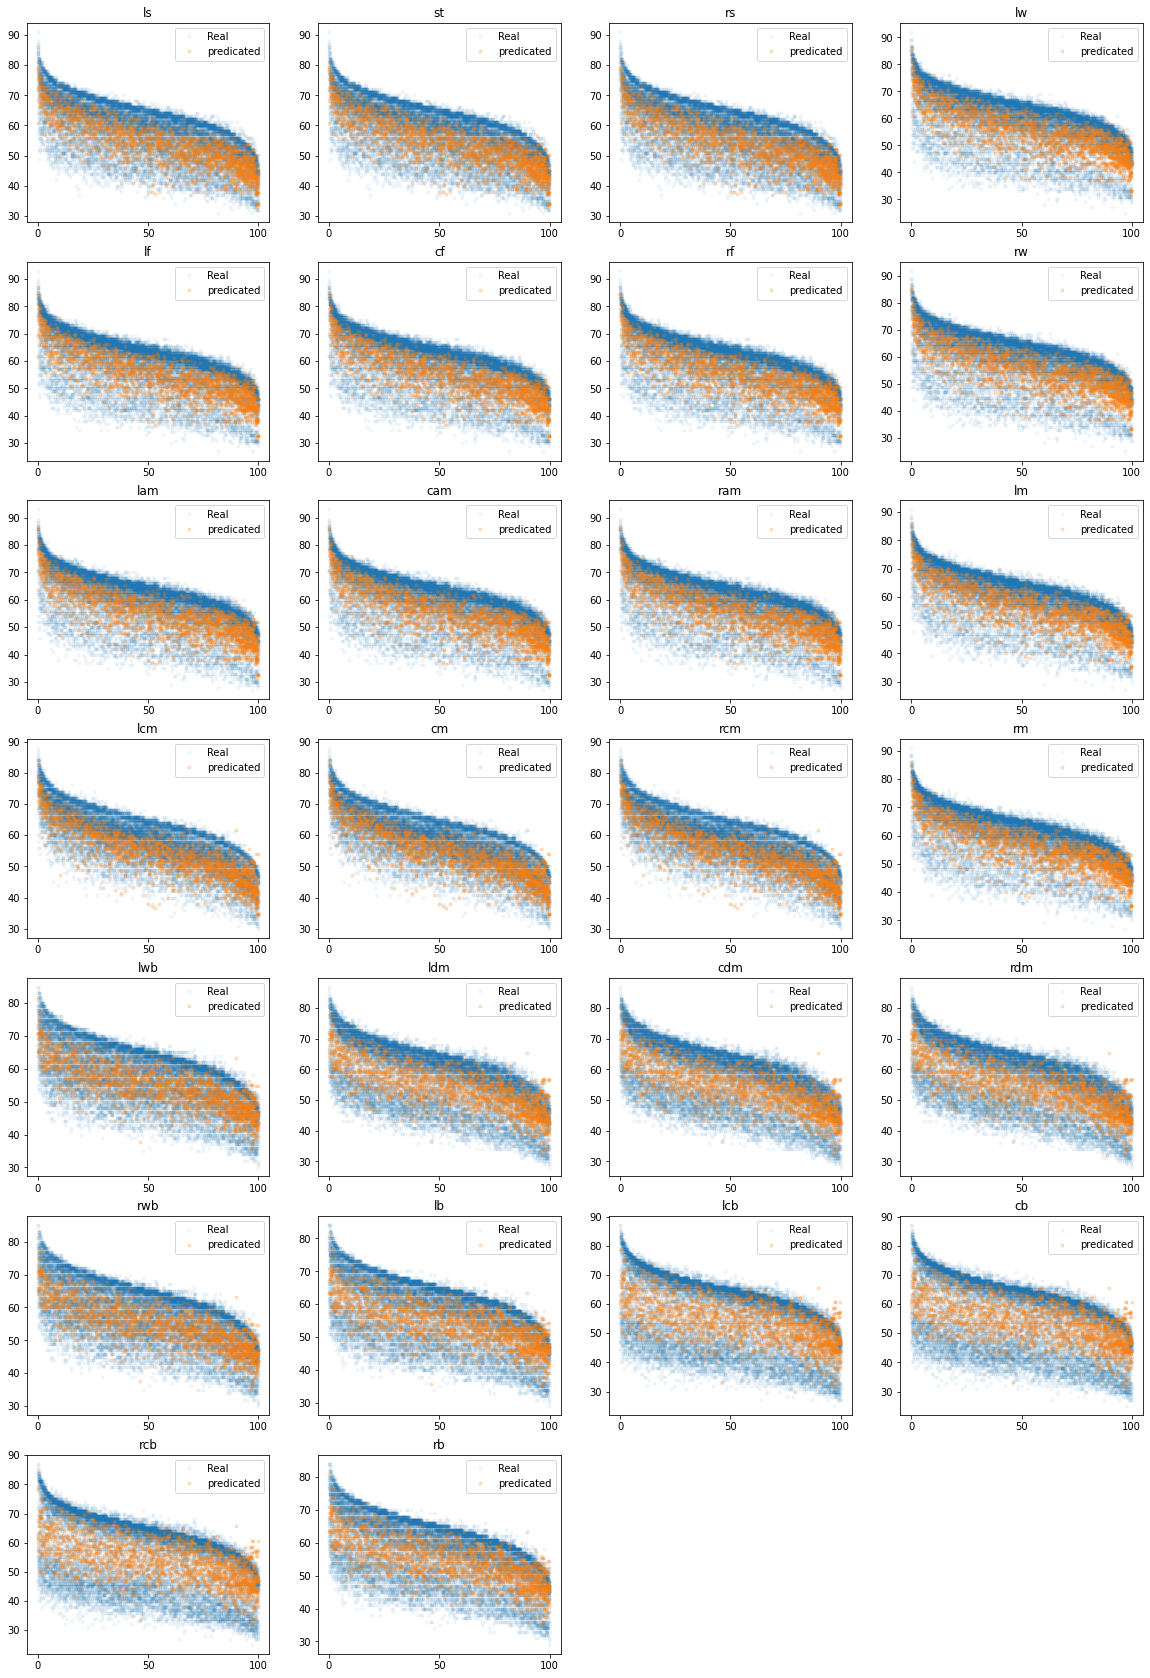

In [31]:
# Visualization the KNN prediction result
plt.figure(figsize = [20, 30])

for i in range(26):
    plt.subplot(7, 4, i+1);
    predication_df[positions_list[i]][predication_df[positions_list2[i]] == 0].plot(ls='', marker='.', alpha=.05,label='Real');
    predication_df[positions_list[i]][predication_df[positions_list2[i]] == 1].plot(ls='', marker='.', alpha=.2,label='predicated');
    plt.title(positions_list[i])
    plt.xticks([0, (predication_df.shape[0] / 2), predication_df.shape[0]], [0,50,100])
    plt.legend()

In [32]:
#Droping cleaned columns
df_cleaned = df2.drop(positions_list, axis=1)

In [33]:
# Merging the predication result to main df
df_cleaned = df_cleaned.reset_index(drop=True) # Reset Index 
predication_df = predication_df[positions_list] # Isolate columns of Interest
predication_df = predication_df.reset_index(drop=True) # Reset Index 
df_cleaned = pd.concat([df_cleaned, predication_df], axis=1) # Merge the 2 df

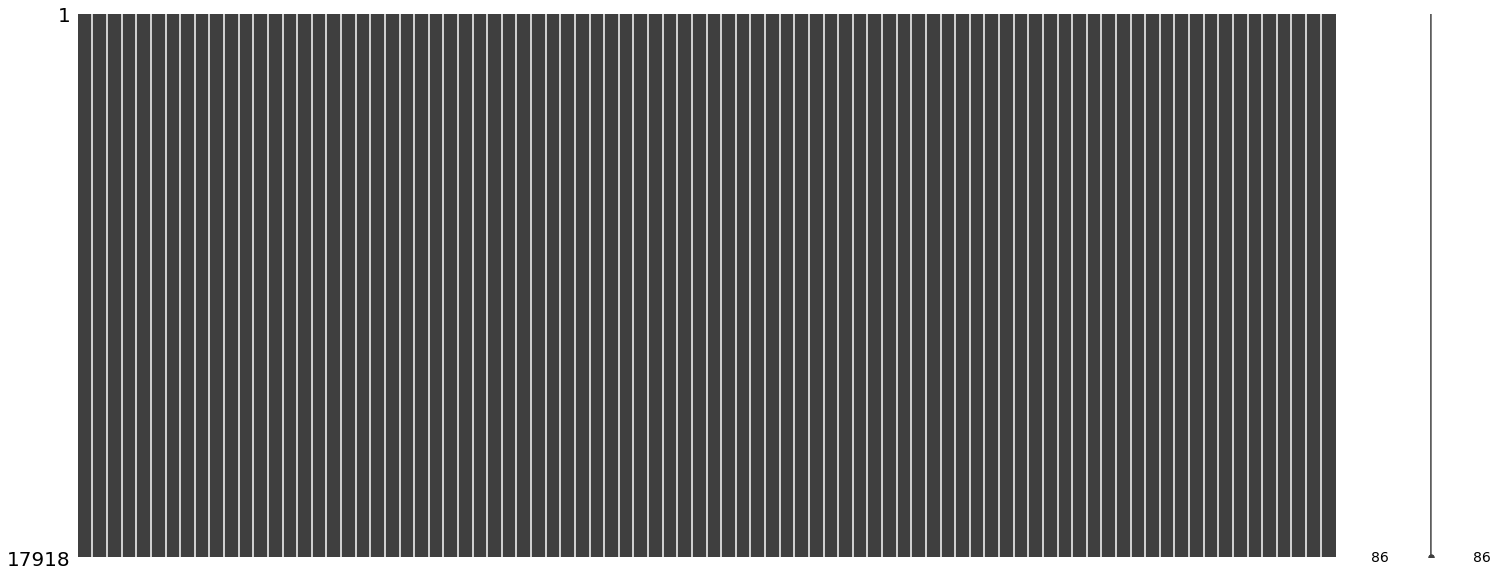

In [34]:
# Visualizating the result of the cleaning process
msno.matrix(df_cleaned);

**Result of the cleaning process?**

>- Set proper columns names
- Remove non-value added data
- Fixed data types 
- Treated missing values with ML model KNN for imputing 


<a id='explore'></a>
## Data Exploration

- Observations
- Actions
- Results




### Observations
- The FIFA 2019 dataset includes list of 17,918 football players from 163 distinct nationalities and distributed over more than 600 football clubs from around the world
- The dataset contains 86 features describing the characterstics of each player like nationality, age, physical characterstics, wages, position on the pitch also skills and performance like (`Attacking` - `Ball handling skills` - `Movement` - `Power` - `Mentality` - `Defending` - `Goalkeeping`)
- Most of the variables are normally distributed with a few features are bimodally distributed and lesser varaibles skewed either to left or to right
- Players who have postions in the center (Striker `ST` - Goal keeper`GK` - Center back `CB` - Center midfeild `CM`) are well represented in the dataset in contrast to players who plays at wings positions like (Left forward `LF` - Right forwad `RF` - Right attack midfield`RAM`- Right attack midfield `LAM`)



- Most of the players are right footed
- England has the highest representation in terms of count of players, generally most of the player are from Europe and South-America
- 75% of all the players in the dataset are under the age of 29, and maximum age observed is 45 years old
- Features in the dataset are highly correlated with each other, as observed there are 22 variables which correlates perfectly with each other, and there are almost 750 combinations of parameters which has correlation greater than 60%, that can be explained as denoted in point **No. 2**, as all the skills features in dataset are describing the above mentioned points (*Attacking, Ball handling skills, Movement, Power, Mentality, Defending and Goalkeeping*)

### Actions
- Group the skills variables into main 7 category listed Above
- Combine the player position on the pitch, so to reduce the number of features from 26 to 4 distinct features (`front` - `midfield` - `back` - `goalkeeping`)
- Convert column `work rate` to numeric with hierarchy
- Convert column `positions` to categorical with 4 distinct values (back, midfeild, front, goalkeeper)
- Convert column `preferred_foot` to binary variable indicates right foot
- Adjust value of column `body_type`, change body type to normal in inconsistent cells


- Substitute columns (`joined`, `contract_valid_until`) with a new feature which measures the duration for the players with their clubs
- Drop columns (`special`, `real_face`) as they don't have clear explanation or interpretation
- Drop columns (`value`, `release_clause`) as they are representing same ratios between 3 variables wage, value and release cols, since we have data for only 1 year we will keep only `wage`
- Rescale columns `international_reputation`, `weak_foot`, `skill_moves` to be between 0-100

<br>

> As a result will be creating a new dataframe where I will *remove, group and combine to introduce a whole new sets of features* which should be more beneficial in terms of **analysis and prediction** , so it would be useful for answering the **research questions**

<br>


### Results
- Making the dataset more concise, legable and comperhandable by reducing the dataset dimensionality from **89 demonstions to 29 dimensions**, while in the same time maintaining all the added value attributes in the dataset 
<br> <br>
- Features multicolinearity has been reduced drastically from an absolute correlation average between all features of the dataset of **39% to 27%** and features which has correlation greater than **60% reduced from 747 variables combinations to 47 only**

In [35]:
df_cleaned.head(2)

,id,name,nationality,club,special,preferred_foot,work_rate,body_type,real_face,position,jersey_number,joined,contract_valid_until,weight_kg,height_cm,age,overall,potential,international_reputation,weak_foot,skill_moves,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,wage_new,release_clause_new,value_new,loaned,durations_with_club,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,L. Messi,Argentina,FC Barcelona,2202,Left,Medium/ Medium,Messi,Yes,RF,10,2004-07-01,2021-01-01,72.121187,173.736,31.0,94.0,94.0,5.0,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,565000.0,226500000.0,110500000.0,0,16.515068,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,2228,Right,High/ Low,C. Ronaldo,Yes,ST,7,2018-07-10,2022-01-01,83.007404,188.976,33.0,94.0,94.0,5.0,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,405000.0,127100000.0,77000000.0,0,3.482192,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0


In [36]:
df_cleaned.nationality.value_counts().head(10)

England        1657
Germany        1195
Spain          1071
Argentina       935
France          911
Brazil          825
Italy           699
Colombia        616
Japan           478
Netherlands     452
Name: nationality, dtype: int64

In [37]:
# count of players in the dataset
print(f'Count of players in the dataset is: {df_cleaned.shape[0]} players')

# count of features in the dataset
print(f'Count of features in the dataset is: {df_cleaned.shape[1]} features')

# count of nationalities in the dataset
print(f'Count of nationalities in the dataset is: {df_cleaned.nationality.nunique()} nationalities')

# count of clubs in the dataset
print(f'Count of clubs in the dataset is: {df_cleaned.club.nunique()} clubs')

Count of players in the dataset is: 17918 players
Count of features in the dataset is: 86 features
Count of nationalities in the dataset is: 163 nationalities
Count of clubs in the dataset is: 651 clubs


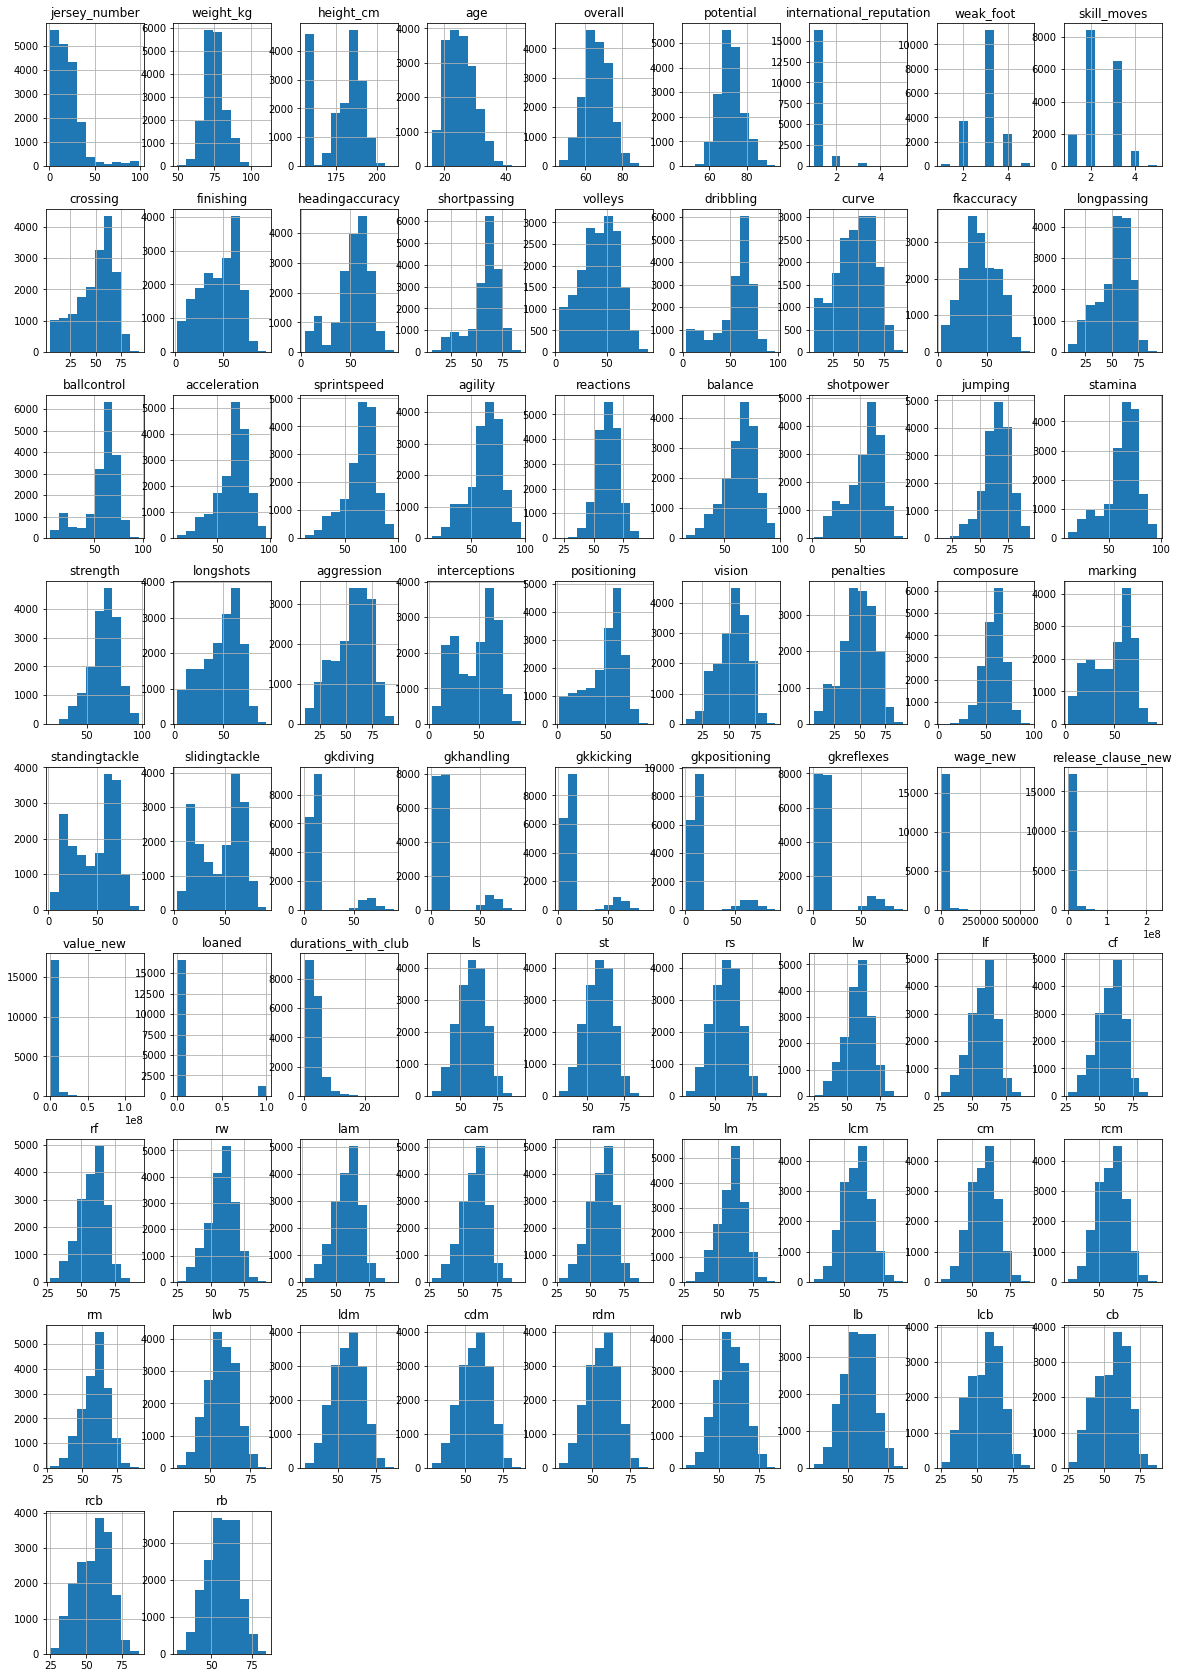

In [38]:
#Exploring quantative variables
df_cleaned.hist(figsize=[20,30]);

**What is the distribution of dataset quantitative features?**
>- Most of the variables are normally distributed with a few features are bimodally distributed and lesser varaibles skewed 
- Most of the features related to goalkeepers are bimodally distributed due to the fact the skill required for goal keeping are fundemently different from all other kind of football players, this is why we can see a huge count of players with low rate on goal keeping causing the distribution to look right skewed
- Most of features related to wages and values are right skewed as the almost 75% of players wages are under 9k Euros, in contrast to a few unique super special players who exceeds that rate by far 

In [39]:
#Exploring quantative variables
df_cleaned.describe()[1:]

,jersey_number,weight_kg,height_cm,age,overall,potential,international_reputation,weak_foot,skill_moves,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,wage_new,release_clause_new,value_new,loaned,durations_with_club,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
mean,19.643041,75.282208,176.692176,25.105257,66.236801,71.329334,1.113908,2.947260,2.362875,49.748856,45.581147,52.295290,58.713417,42.932135,55.411207,47.215816,42.882018,52.724300,58.411151,64.601518,64.720672,63.523384,61.820516,63.962384,55.490512,65.116475,63.205994,65.323697,47.130316,55.879060,46.690870,49.995758,53.448934,48.544480,58.655263,47.264092,47.684005,45.643208,16.590356,16.367675,16.205659,16.360308,16.68367,9883.748186,4.258800e+06,2.448629e+06,0.070544,3.457871,57.333296,57.333296,57.333296,58.509577,58.192600,58.192600,58.192600,58.509577,58.446289,58.446289,58.446289,59.210448,57.702857,57.702857,57.702857,59.210448,57.115091,56.435729,56.435729,56.435729,57.115091,56.451948,55.346255,55.346255,55.346255,56.451948
std,16.008322,7.077894,13.668626,4.675372,6.929243,6.144098,0.395495,0.660106,0.756309,18.354989,19.512533,17.367823,14.680340,17.688194,18.904436,18.389442,17.483142,15.311376,16.665568,14.947197,14.666098,14.768421,9.024412,14.149768,17.215926,11.836960,15.892897,12.552242,19.251517,17.354347,20.691841,19.521104,14.119193,15.691563,11.420965,19.874746,21.647674,21.270735,17.661697,16.877771,16.468529,16.992206,17.91613,22142.768987,1.078045e+07,5.631804e+06,0.256068,2.319231,9.091794,9.091794,9.091794,9.824179,9.798585,9.798585,9.798585,9.824179,9.747079,9.747079,9.747079,9.242454,8.844199,8.844199,8.844199,9.242454,8.822617,9.873828,9.873828,9.873828,8.822617,9.300720,11.320598,11.320598,11.320598,9.300720
min,1.000000,49.895161,155.448000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1000.000000,0.000000e+00,0.000000e+00,0.000000,0.246575,31.000000,31.000000,31.000000,25.000000,27.000000,27.000000,27.000000,25.000000,27.000000,27.000000,27.000000,27.000000,30.000000,30.000000,30.000000,27.000000,30.000000,28.000000,28.000000,28.000000,30.000000,29.000000,25.000000,25.000000,25.000000,29.000000
25%,8.000000,69.853225,155.752800,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,39.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.00000,1000.000000,4.190000e+05,3.250000e+05,0.000000,1.923288,51.000000,51.000000,51.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,53.000000,52.000000,52.000000,52.000000,53.000000,51.000000,49.000000,49.000000,49.000000,51.000000,50.000000,46.000000,46.000000,46.000000,50.000000
50%,17.000000,74.842741,179.832000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,49.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.00000,3000.000000,1.000000e

In [40]:
len(df_cleaned.columns[2:11])

9

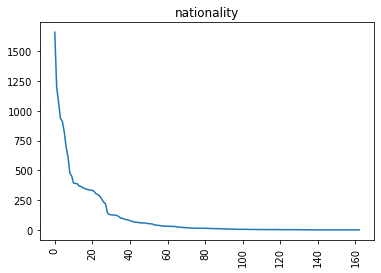

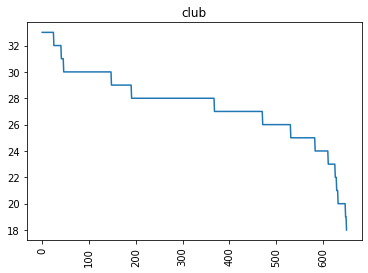

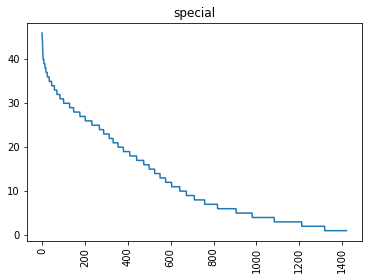

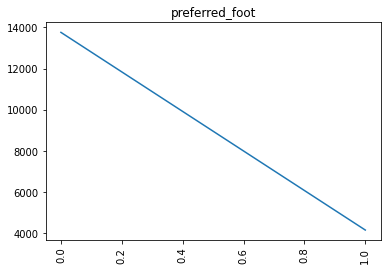

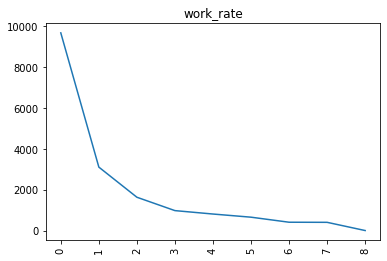

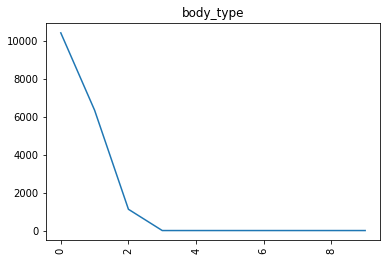

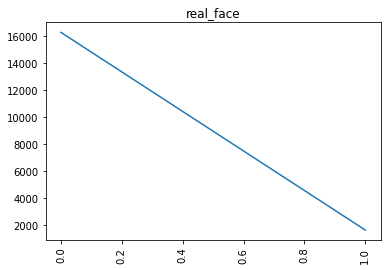

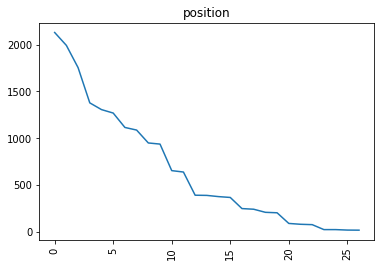

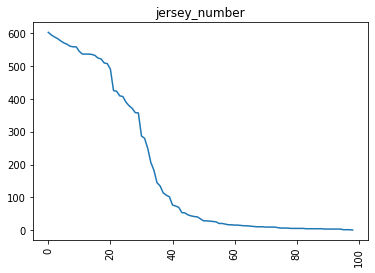

In [41]:
# Exploring categorical variables

#plt.figure(figsize = [5, 5])
c = 0
for i in df_cleaned.columns[2:11]:
    
    ind = df_cleaned[i].value_counts().index
    val = df_cleaned[i].value_counts().values
    
    #print(f'Variable: {i}')
    #print(df_cleaned[i].value_counts().describe())
    #print('.'*50)
    
    
    c = c + 1
    #plt.subplot(5, 2, counter)
    plt.plot(val);
    plt.xticks(rotation=90)
    plt.title(i)
    plt.show()
    


**Observations on qualitative features?**
>- England has the highest representation in terms of count of players, generally most of the player are from Europe and South-America
- Range of players count per club is between 18 to 33 players
- Majority of the players are right footed with normal body type
- Majority of players are playing in defence and midfield position

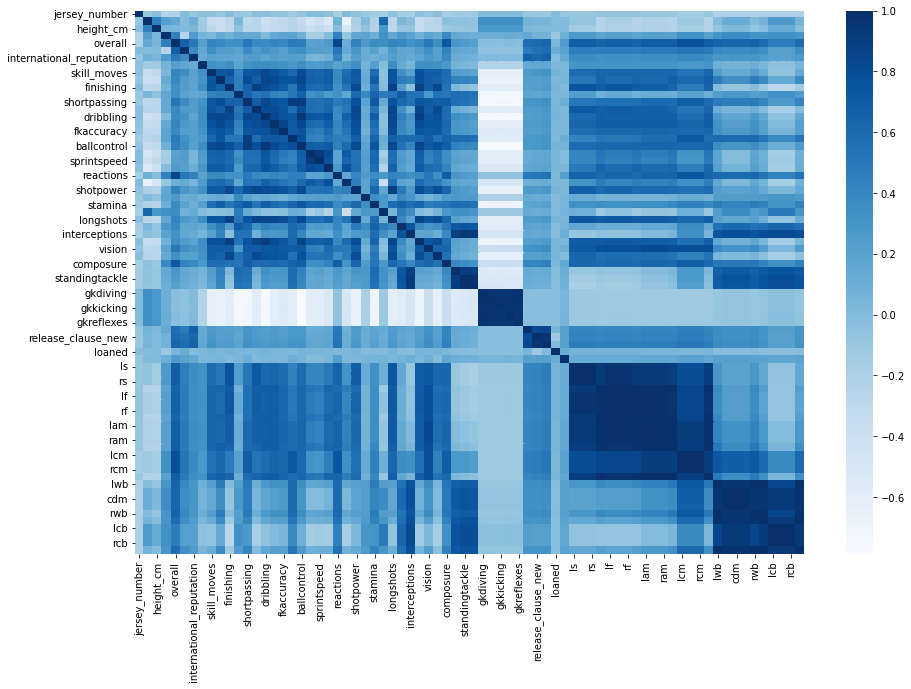

In [42]:
# Heat map to check for correlation accross all variables in the dataset
plt.figure(figsize=[15, 10])
sns.heatmap(df_cleaned.corr(), cmap='Blues');

In [43]:
#converting correlation matrix to df 
df_corr = df_cleaned.corr()
corr_table = df_corr[abs(df_corr) >= 0.01].stack().reset_index()
corr_table = corr_table[corr_table['level_0'].astype(str)!=corr_table['level_1'].astype(str)]
corr_table['ordered-cols'] = corr_table.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)
corr_table = corr_table.drop_duplicates(['ordered-cols'])
#corr_table.drop(['ordered-cols'], axis=1, inplace=True)
corr_table['abs_corr_val'] = abs(corr_table[0])

corr_table = corr_table.sort_values('abs_corr_val', ascending=False).reset_index()

corr_table.head()

,index,level_0,level_1,0,ordered-cols,abs_corr_val
0,3898,cf,rf,1.0,cf-rf,1.0
1,3751,lw,rw,1.0,lw-rw,1.0
2,3823,lf,cf,1.0,cf-lf,1.0
3,4781,ldm,rdm,1.0,ldm-rdm,1.0
4,4853,cdm,rdm,1.0,cdm-rdm,1.0


In [44]:
# Quantifing correlation matrix results
total = corr_table.shape[0]
perfect_corr = (corr_table['abs_corr_val'] == 1).sum()
corr_above80 = (corr_table['abs_corr_val'] > 0.79).sum()
corr_above70 = (corr_table['abs_corr_val'] > 0.69).sum()
corr_above60 = (corr_table['abs_corr_val'] > 0.59).sum()
AVG_correlation = corr_table['abs_corr_val'].mean()

print(f'Total combinations created by the correlation matrix is {total}')
print(f'There are {perfect_corr} variables which have a perfect 100% correlation between each others')
print(f'There are {corr_above80} variables which have correlation greater than 80% between each others')
print(f'There are {corr_above70} variables which have correlation greater than 70% between each others')
print(f'There are {corr_above60} variables which have correlation greater than 60% between each others')
print(f'Absolute average of correlation is {AVG_correlation: .2f} ')


Total combinations created by the correlation matrix is 2644
There are 22 variables which have a perfect 100% correlation between each others
There are 246 variables which have correlation greater than 80% between each others
There are 427 variables which have correlation greater than 70% between each others
There are 747 variables which have correlation greater than 60% between each others
Absolute average of correlation is  0.39 


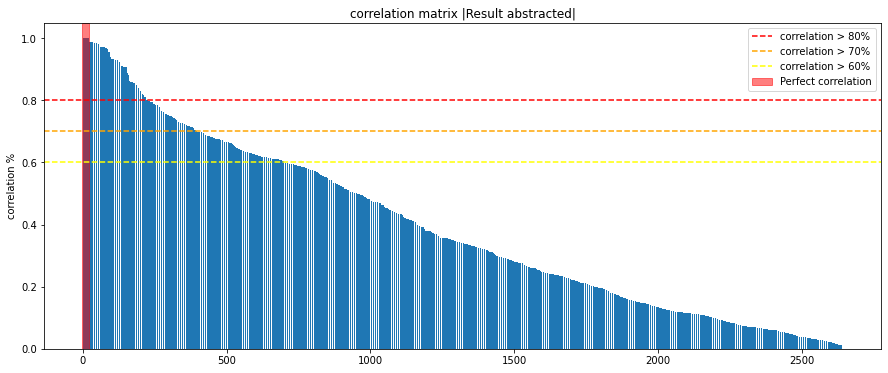

In [45]:
# Visualizing correation dataframe based on strength on abstract level by ignoring direction
plt.figure(figsize=[15, 6])
plt.bar(corr_table.index, corr_table['abs_corr_val']);
plt.axhline(0.8, c='r', ls='--', label='correlation > 80%');
plt.axhline(0.7, c='orange', ls='--', label='correlation > 70%');
plt.axhline(0.6, c='yellow', ls='--', label='correlation > 60%');
plt.axvspan(-2, 22, color='r', alpha =0.5, label='Perfect correlation');
plt.title('correlation matrix |Result abstracted|')
plt.ylabel('correlation %')
plt.legend();

**Observations on correlation matrix**
> - Total combinations created by the correlation matrix is 2644
- There are 22 variables which have a perfect 100% correlation between each others
- There are 246 variables which have correlation greater than 80% between each others
- There are 427 variables which have correlation greater than 70% between each others
- There are 747 variables which have correlation greater than 60% between each others
- Absolute average of correlation is  0.39 

In [46]:
# Splitting the features of the dataset into categories
attack_list = ['crossing', 'finishing', 'headingaccuracy', 'shortpassing', 'volleys']
skill_list = ['dribbling', 'curve', 'fkaccuracy', 'longpassing', 'ballcontrol']
movement_list = ['acceleration', 'sprintspeed', 'agility', 'reactions', 'balance']
power_list = ['shotpower', 'jumping', 'stamina', 'strength', 'longshots']
mentality_list = ['aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure']
defence_list =['marking', 'standingtackle', 'slidingtackle']
gk_list = ['gkdiving', 'gkhandling', 'gkkicking', 'gkpositioning', 'gkreflexes']

player_list = ['id', 'name', 'nationality', 'club', 'special', 'loaned', 'preferred_foot',
       'work_rate', 'body_type', 'real_face', 'position', 'jersey_number',
       'joined', 'contract_valid_until', 'durations_with_club', 'weight_kg', 'height_cm', 'age',
       'overall', 'potential', 'international_reputation', 'weak_foot',
       'skill_moves']

value_list = ['wage_new']

position_rate_list = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw',
       'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
cols_list = [attack_list, skill_list, movement_list, power_list, mentality_list, defence_list,
        gk_list, position_rate_list, player_list, value_list]


In [47]:
len(position_rate_list)

26

In [48]:
# Creating new variables compiling similar features
vars_compiled = [attack_list, skill_list, movement_list, power_list, mentality_list, defence_list, gk_list] 
vars_name = ['attack', 'skill', 'movement', 'power', 'mentality', 'defence', 'gk']

attack = list(df_cleaned[attack_list].mean(axis=1))
skill = list(df_cleaned[skill_list].mean(axis=1))
movement = list(df_cleaned[movement_list].mean(axis=1))
power = list(df_cleaned[power_list].mean(axis=1))
mentality = list(df_cleaned[mentality_list].mean(axis=1))
defence = list(df_cleaned[defence_list].mean(axis=1))
gk = list(df_cleaned[gk_list].mean(axis=1))

In [49]:
# Convert column "work rate" to numeric with hierarchy
work_rate_dict = {'Low/ Low': 1, 'Low/ Medium': 2, 'Low/ High': 3,  'Medium/ Low': 2,
                  'Medium/ Medium': 4, 'Medium/ High':5, 'High/ High':6, 'High/ Medium': 5, 'High/ Low': 3}
wk_rate = list(df_cleaned['work_rate'].map(work_rate_dict))

In [50]:
# Convert columns positions to categorical with 4 distinct values (back, midfeild, front, goalkeeper)
mid_list = ['RM', 'LAM', 'LM', 'RDM', 'CM', 'RAM', 'LDM', 'CAM', 'CDM', 'LCM']
mid_list_lower = [x.lower() for x in mid_list]

back_list = ['RWB', 'LWB', 'RB', 'LB', 'LCB', 'CB', 'RCB', 'RCM']
back_list_lower = [x.lower() for x in back_list]

front_list = ['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RW', 'CF']
front_list_lower = [x.lower() for x in front_list]

midfield = list(df_cleaned[mid_list_lower].mean(axis=1))
back = list(df_cleaned[back_list_lower].mean(axis=1))
front = list(df_cleaned[front_list_lower].mean(axis=1))


positin_dict = {'RM':'back', 'LAM':'back', 'LM':'back', 'RDM':'back', 'CM':'back', 'RAM':'back', 
                'LDM':'back', 'CAM':'back', 'CDM':'back', 'LCM':'back',
                'RWB' : 'midfield', 'LWB' : 'midfield', 'RB' : 'midfield', 'LB' : 'midfield', 
                'LCB' : 'midfield', 'CB' : 'midfield', 'RCB' : 'midfield', 'RCM' : 'midfield',
                'RF' : 'front', 'ST' : 'front', 'LW' : 'front', 'LF' : 'front', 'RS' : 'front',
                'LS' : 'front', 'RW' : 'front', 'CF' : 'front', 'GK' : 'goalkeeper'}

positi = list(df_cleaned['position'].map(positin_dict))


In [51]:
# Convert column "preferred_foot" to binary variable indicates right foot
foot_dict = {'Left':0, 'Right':1}
right_foot = list(df_cleaned['preferred_foot'].map(foot_dict))

In [52]:
# Adjust value of column "body_type", change body type to normal in inconsistent cells
body_dict = {'Normal':'normal', 'Lean':'lean', 'Stocky':'stocky', 'Messi':'normal', 
              'C. Ronaldo':'normal', 'Neymar':'normal', 'Courtois':'normal', 
              'PLAYER_BODY_TYPE_25':'normal', 'Shaqiri':'normal', 'Akinfenwa':'normal'}

body_type = list(df_cleaned['body_type'].map(body_dict))

In [53]:
# Rescale columns ('international_reputation', 'weak_foot', 'skill_moves') to be between 0-100

df_cleaned['int_rept'] = df_cleaned['international_reputation'] * 20
df_cleaned['weak_ft'] = df_cleaned['weak_foot'] * 20
df_cleaned['skl_move'] = df_cleaned['skill_moves'] * 20

In [54]:
df_new = df_cleaned.copy()

In [55]:
#Drop columns which has been transformed or don't have clear explanation.
drop_cols = ['special', 'real_face', 'preferred_foot', 'position', 'joined', 'contract_valid_until', 
             'work_rate', 'body_type', 'value_new', 'release_clause_new',
            'international_reputation', 'weak_foot', 'skill_moves']

df_new = df_new.drop(drop_cols, axis=1)
df_new = df_new.drop(attack_list, axis=1)
df_new = df_new.drop(skill_list, axis=1)
df_new = df_new.drop(movement_list, axis=1)
df_new = df_new.drop(power_list, axis=1)
df_new = df_new.drop(mentality_list, axis=1)
df_new = df_new.drop(defence_list, axis=1)
df_new = df_new.drop(gk_list, axis=1)
df_new = df_new.drop(mid_list_lower, axis=1)
df_new = df_new.drop(back_list_lower, axis=1)
df_new = df_new.drop(front_list_lower, axis=1)

In [56]:
#Merge new transformed variables

transformed_vars = [right_foot, body_type, attack, skill, movement, power, mentality, defence,
                    gk, wk_rate, midfield, back, front, positi]


df_new['right_foot'] = right_foot
df_new['body_type'] = body_type
df_new['wk_rate'] = wk_rate
df_new['attack'] = attack
df_new['skill'] = skill
df_new['movement'] = movement
df_new['power'] = power
df_new['mentality'] = mentality
df_new['defence'] = defence
df_new['gk'] = gk
df_new['midfield'] = midfield
df_new['back'] = back
df_new['front'] = front
df_new['position'] = positi


In [57]:
# Reorder & Renamce the columns of the df

cols_order = ['id', 'name', 'nationality', 'club', 'durations_with_club', 'loaned', 'body_type',
              'weight_kg','height_cm', 'age', 'right_foot', 'wk_rate', 'jersey_number', 'position', 
              'overall', 'potential', 'int_rept', 'weak_ft', 'skl_move', 'attack', 'skill', 'movement', 
              'power', 'mentality', 'defence', 'gk', 'midfield', 'back', 'front', 'wage_new']

df_new = df_new[cols_order].copy()

cols_rename = ['id', 'name', 'nationality', 'club', 'duration', 'loaned', 'body_type',
              'wgt_kg','hgt_cm', 'age', 'right_ft', 'wk_rate', 'jersey', 'position', 
              'overall', 'potential', 'int_rept', 'weak_ft', 'skl_move', 'attack', 'skill', 'movement', 
              'power', 'mentality', 'defence', 'gk', 'midfield', 'back', 'front', 'wage']

df_new.columns = cols_rename

In [58]:
# A taste of the new df
print(df_new.shape)
df_new.head()

(17918, 30)


,id,name,nationality,club,duration,loaned,body_type,wgt_kg,hgt_cm,age,right_ft,wk_rate,jersey,position,overall,potential,int_rept,weak_ft,skl_move,attack,skill,movement,power,mentality,defence,gk,midfield,back,front,wage
0,158023,L. Messi,Argentina,FC Barcelona,16.515068,0,normal,72.121187,173.7360,31.0,0,4,10,front,94.0,94.0,100.0,80.0,80.0,85.0,93.4,91.6,75.6,71.500000,29.000000,10.8,81.20,58.875,90.875,565000.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,3.482192,0,normal,83.007404,188.9760,33.0,1,3,7,front,94.0,94.0,100.0,80.0,100.0,87.0,83.2,86.6,90.0,74.833333,27.333333,11.6,78.50,61.500,90.125,405000.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,4.416438,0,normal,68.038855,179.8320,26.0,1,5,10,front,92.0,93.0,100.0,100.0,100.0,79.2,88.8,91.6,70.6,73.833333,28.000000,11.8,78.50,59.000,87.125,290000.0
3,193080,De Gea,Spain,Manchester United,8.509589,0,lean,76.203518,195.0720,27.0,1,4,1,goalkeeper,91.0,93.0,80.0,60.0,20.0,22.8,30.2,61.6,43.4,42.666667,16.333333,88.8,80.18,67.375,83.500,260000.0
4,192985,K. De Bruyne,Belgium,Manchester City,7.345205,0,normal,69.853225,155.7528,27.0,1,6,7,midfield,91.0,92.0,80.0,100.0,80.0,80.8,87.2,80.2,82.0,80.833333,59.000000,11.2,84.50,73.125,85.125,355000.0


In [59]:
df_new.describe()

,duration,loaned,wgt_kg,hgt_cm,age,right_ft,wk_rate,jersey,overall,potential,int_rept,weak_ft,skl_move,attack,skill,movement,power,mentality,defence,gk,midfield,back,front,wage
count,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000
mean,3.457871,0.070544,75.282208,176.692176,25.105257,0.767720,4.168657,19.643041,66.236801,71.329334,22.278156,58.945195,47.257506,49.854169,51.328898,63.725695,59.253399,52.202394,46.863768,16.441534,57.847266,56.359463,57.949605,9883.748186
std,2.319231,0.256068,7.077894,13.668626,4.675372,0.422299,0.910590,16.008322,6.929243,6.144098,7.909905,13.202127,15.126181,14.846022,15.865461,11.200195,11.071516,12.211173,20.415154,16.965201,8.151886,9.160379,9.431752,22142.768987
min,0.246575,0.000000,49.895161,155.448000,16.000000,0.000000,1.000000,1.000000,46.000000,48.000000,20.000000,20.000000,20.000000,7.800000,8.600000,24.000000,20.200000,10.500000,5.000000,1.000000,31.800000,30.000000,28.000000,1000.000000
25%,1.923288,0.000000,69.853225,155.752800,21.000000,1.000000,4.000000,8.000000,62.000000,67.000000,20.000000,60.000000,40.000000,44.400000,44.000000,57.800000,53.400000,46.666667,27.666667,9.600000,52.300000,49.625000,51.625000,1000.000000
50%,3.002740,0.000000,74.842741,179.832000,25.000000,1.000000,4.000000,17.000000,66.000000,71.000000,20.000000,60.000000,40.000000,52.800000,54.000000,65.600000,61.000000,53.833333,53.000000,10.800000,58.100000,56.825000,58.712500,3000.000000
75%,4.498630,0.000000,79.832257,185.928000,28.000000,1.000000,5.000000,26.000000,71.000000,75.000000,20.000000,60.000000,60.000000,59.800000,62.200000,71.400000,67.200000,60.500000,64.333333,12.000000,63.500000,63.125000,64.675000,9000.000000
max,29.608219,1.000000,110.222946,210.312000,45.000000,1.000000,6.000000,99.000000,94.000000,95.000000,100.000000,100.000000,100.000000,87.000000,93.400000,92.200000,90.000000,83.166667,92.000000,88.800000,85.200000,83.625000,90.875000,565000.000000


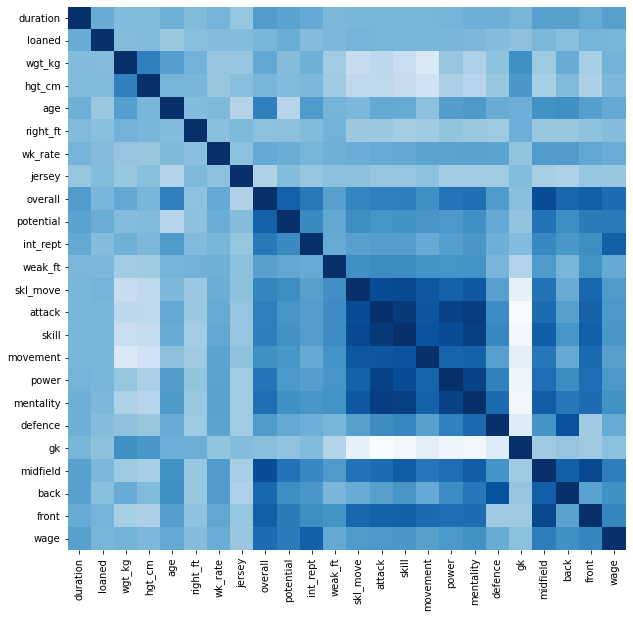

In [60]:
# Heat map to check for correlation accross all variables in the dataset
plt.figure(figsize=[10, 10])
sns.heatmap(df_new.corr(), cmap='Blues', cbar=False); #, annot=True, fmt=".2f", linewidths=.5

**Observations on correlation matrix after applying feature engineering and fixing collinearity**

>- Reducing the dataset dimensionality from 89 demonstions to 29 dimensions
- Features multicolinearity has been reduced drastically from an absolute correlation average between all features of the dataset of 39% to 27% and features which has correlation greater than 60% reduced from 747 variables combinations to 47 only
- Total combinations created by the correlation matrix is 266
- There are 0 variables which have a perfect 100% correlation between each others
- There are 10 variables which have correlation greater than 80% between each others
- There are 19 variables which have correlation greater than 70% between each others
- There are 36 variables which have correlation greater than 60% between each others
- Absolute average of correlation is  0.26 

In [61]:
# Testing colinearity of new_df
# converting correlation matrix to df 
df_corr = df_new.corr()
corr_table = df_corr[abs(df_corr) >= 0.01].stack().reset_index()
corr_table = corr_table[corr_table['level_0'].astype(str)!=corr_table['level_1'].astype(str)]
corr_table['ordered-cols'] = corr_table.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)
corr_table = corr_table.drop_duplicates(['ordered-cols'])
#corr_table.drop(['ordered-cols'], axis=1, inplace=True)
corr_table['abs_corr_val'] = abs(corr_table[0])

corr_table = corr_table.sort_values('abs_corr_val', ascending=False).reset_index()

corr_table.head()

,index,level_0,level_1,0,ordered-cols,abs_corr_val
0,308,attack,skill,0.933932,attack-skill,0.933932
1,311,attack,mentality,0.896393,attack-mentality,0.896393
2,335,skill,mentality,0.892785,mentality-skill,0.892785
3,383,power,mentality,0.869065,mentality-power,0.869065
4,310,attack,power,0.867657,attack-power,0.867657


In [62]:
# Quantifing correlation matrix results
total = corr_table.shape[0]
perfect_corr = (corr_table['abs_corr_val'] == 1).sum()
corr_above80 = (corr_table['abs_corr_val'] > 0.79).sum()
corr_above70 = (corr_table['abs_corr_val'] > 0.69).sum()
corr_above60 = (corr_table['abs_corr_val'] > 0.59).sum()
AVG_correlation = corr_table['abs_corr_val'].mean()

print(f'Total combinations created by the correlation matrix is {total}')
print(f'There are {perfect_corr} variables which have a perfect 100% correlation between each others')
print(f'There are {corr_above80} variables which have correlation greater than 80% between each others')
print(f'There are {corr_above70} variables which have correlation greater than 70% between each others')
print(f'There are {corr_above60} variables which have correlation greater than 60% between each others')
print(f'Absolute average of correlation is {AVG_correlation: .2f} ')


Total combinations created by the correlation matrix is 266
There are 0 variables which have a perfect 100% correlation between each others
There are 10 variables which have correlation greater than 80% between each others
There are 19 variables which have correlation greater than 70% between each others
There are 36 variables which have correlation greater than 60% between each others
Absolute average of correlation is  0.26 


<a id='Dashboard'></a>
## Project Dashboard



In [63]:
# statistics about players skills
stats = df_new.describe()[1:]
def corr_matrix_func():
    corr_matrix_vars = list(df_new.columns[14:-1])
    sns.heatmap(stats[corr_matrix_vars], cmap='Blues', annot=True, cbar=False, lw=0.5)

In [64]:
# Describing the statistics of skills variables
new_feat_list = list(df_new.columns[14:-1])

new_feat_list.remove('gk')
new_feat_list.remove('int_rept')
new_feat_list.remove('weak_ft')
new_feat_list.remove('skl_move')

new_feat = df_new[new_feat_list].stack()
new_feat_df = pd.DataFrame(new_feat).reset_index()
new_feat_df.columns = ['index', 'feature', 'score']
new_feat_df.drop('index', inplace=True, axis=1)

In [65]:
# distribution of skills features=
def Players_skills_func():
    sns.stripplot(x = "feature", y = "score", data = new_feat_df, color='k', alpha=0.1, size=1, jitter=0.35);
    sns.boxplot(x = "feature", y = "score", data = new_feat_df, showmeans=True,
                meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"});
    plt.title("Players skills rating");

In [66]:
# Top and bottom 10 clubs in terms of average rates and wages
club_rate = df_new.groupby('club')['overall'].mean()
club_wage = df_new.groupby('club')['wage'].mean()

avg_df = pd.concat([club_rate, club_wage], axis = 1)

avg_df['wage1'] = (avg_df['wage']-min(avg_df['wage']))/(max(avg_df['wage'])-min(avg_df['wage']))
avg_df['wage1'] = avg_df['wage1'] * 100
avg_df.head()

avg_df_10 = avg_df.drop('wage', axis=1)
top10 = avg_df_10.sort_values('overall', ascending=False).iloc[0:10,].sort_values('overall', ascending=True)
bottom10 = avg_df_10.sort_values('overall', ascending=True).iloc[0:10,].sort_values('overall', ascending=True)
avg_bar = pd.concat([bottom10, top10])

avg_bar

,overall,wage1
club,,
Bray Wanderers,53.652174,0.000000
Limerick FC,54.526316,0.000000
Bohemian FC,55.000000,0.000000
Derry City,55.777778,0.036784
Sligo Rovers,56.631579,0.000000
Crewe Alexandra,56.785714,0.851296
Cambridge United,56.928571,0.591177
Morecambe,57.000000,0.425648
Waterford FC,57.200000,0.052970


In [67]:
# polar graph attributes
features_list = list(df_new.columns[14:-5])
features_list.append(features_list[0])
label_placement = np.linspace(0, 2*np.pi, len(features_list))
y_polar = list(df_new[features_list].mean())

def polar_func():
    #plt.subplot(projection = 'polar')
    plt.plot(label_placement, y_polar)
    line, labels = plt.thetagrids(np.degrees(label_placement), labels=features_list)

In [68]:
def hide_spines(ax):
    return ax.spines['right'].set_visible(False), ax.spines['left'].set_visible(False), ax.spines['top'].set_visible(False), ax.spines['bottom'].set_visible(False)
    

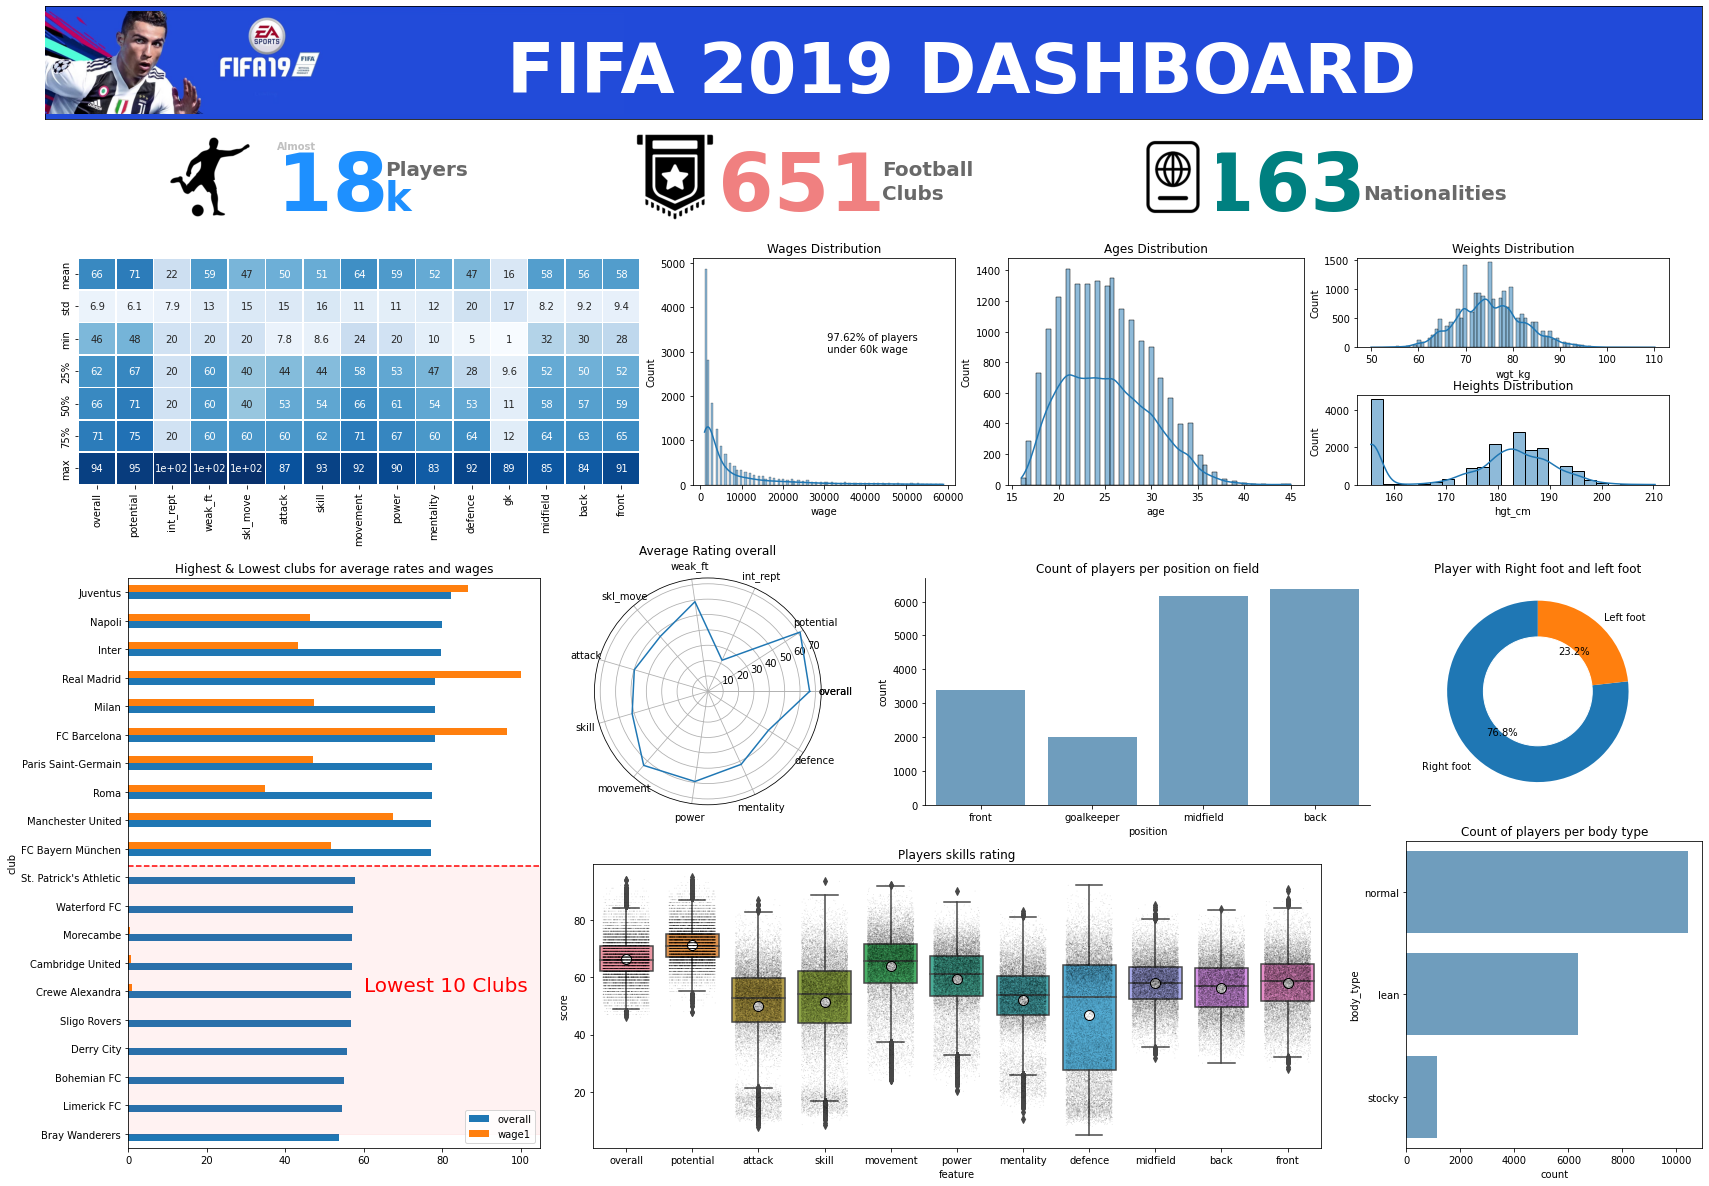

In [69]:
# Dashboard

fig = plt.figure(figsize=[29.7, 21]); 
grid = fig.add_gridspec(100, 100);
fig.tight_layout()

fig.set_facecolor('white')

# Plotting the dashboard header
grid_2 = grid[0:10, :]
ax1 = fig.add_subplot(grid_2);
fifa_color = (0.13, 0.29, 0.85, 1) # Axis background color
ax1.set_facecolor(fifa_color)
ax1.set_xticks([]);
ax1.set_yticks([]);

grid_header = grid[0:10, :35]
ax2 = fig.add_subplot(grid_header);
header_photo = plt.imread('fi.jpg') # Reading Header
ax2.imshow(header_photo) 
#ax2.spines[['right', 'left', 'top', 'bottom']].set_visible(False)
hide_spines(ax2)
ax2.text(2000, 350, "FIFA 2019 DASHBOARD", color='white', fontsize = 70, weight='bold'); 
ax2.set_xticks([]);
ax2.set_yticks([]);


# grid for statistics about players skills
grid_correlation1 = grid[22:42, 2:36]
ax4 = fig.add_subplot(grid_correlation1);
corr_matrix_func()

# grid for histogram about players wages distribution
grid_wage = grid[22:42, 39:55]
ax5 = fig.add_subplot(grid_wage);

sns.histplot(df_new['wage'][df_new['wage'] < 60000], kde=True, ax=ax5);
#ax5.hist(df_new['wage'][df_new['wage'] < 60000], alpha=0.5, edgecolor='gray')
ax5.set_title('Wages Distribution');
wages_dist = ((df_new['wage']<60000).sum() / df_new.shape[0]) * 100
ax5.text(30000, 3000, f'{wages_dist: .2f}% of players\n under 60k wage');




# grid for histogram about players ages distribution
grid_age = grid[22:42, 58:76]
ax6 = fig.add_subplot(grid_age);
ax6.set_title('Ages Distribution');
#ax6.hist(df_new['age'], alpha=0.5)
sns.histplot(df_new['age'], kde=True, ax=ax6);




# grid for histogram about players Weights distribution
grid_weight = grid[22:30, 79:98]
ax7 = fig.add_subplot(grid_weight);
ax7.set_title('Weights Distribution');
#ax7.hist(df_new['wgt_kg'], alpha=0.5)
sns.histplot(df_new['wgt_kg'], kde=True, ax=ax7);


# grid for histogram about players Heights distribution
grid_height = grid[34:42, 79:98]
ax8 = fig.add_subplot(grid_height);
ax8.set_title('Heights Distribution');
#ax8.hist(df_new['hgt_cm'], alpha=0.5)
sns.histplot(df_new['hgt_cm'], kde=True, ax=ax8);


# grid for boxplot about players skills distribution
grid_skills_box = grid[75:100, 33:77]
ax9 = fig.add_subplot(grid_skills_box);
Players_skills_func()



# Grid for top and bottom 10 clubs in terms of average rates and wages
grid_clubs = grid[50:, 5:30]
ax10 = fig.add_subplot(grid_clubs);
avg_bar.plot.barh(ax=ax10);
ax10.axhline(9.4, c='r', ls='--');

ax10.axhspan(0, 9.4, color='red', alpha=0.05);

ax10.text(60, 5, "Lowest 10 Clubs", fontsize=20, color='red');
ax10.legend(loc='lower right');
ax10.set_title('Highest & Lowest clubs for average rates and wages');


# Grid for top and bottom 10 clubs in terms of average rates and wages
grid_polar = grid[50:70, 30:50]
ax11 = fig.add_subplot(grid_polar, projection = 'polar');
polar_func()
ax11.set_title('Average Rating overall');


# Grid for Count of players per position on field
grid_ = grid[50:70, 53:80]
ax12 = fig.add_subplot(grid_);
ax12.set_title('Count of players per position on field');
sns.countplot(x='position', data=df_new, ax=ax12, color='tab:blue', alpha=0.7);
ax12.spines['right'].set_visible(False)
ax12.spines['top'].set_visible(False)


# Grid for Player with Right foot and left foot
grid_1 = grid[50:70, 80:]
ax13 = fig.add_subplot(grid_1);

plt.pie(df_new['right_ft'].value_counts(), startangle=90, labels=['Right foot', 'Left foot'], autopct='%1.1f%%');
circle =plt.Circle((0, 0), 0.6, color= 'white');
circle_fig = plt.gcf();
circle_fig.gca().add_artist(circle);
ax13.set_title('Player with Right foot and left foot');



# Grid for Count of players per body type
grid_2 = grid[73:100, 82:]
ax14 = fig.add_subplot(grid_2);
sns.countplot(y='body_type', data=df_new, ax = ax14, color='tab:blue', alpha=0.7);
ax14.set_title('Count of players per body type');


# ====================================

grid_cards = grid[10:20, :]
ax3 = fig.add_subplot(grid_cards);
#ax3.spines[['right', 'left', 'top', 'bottom']].set_visible(False)
hide_spines(ax3)
ax3.set_xticks([]);
ax3.set_yticks([]);

ax3.text(0.14, 0.2, "18", color='dodgerblue', fontsize = 80, weight='bold'); 
ax3.text(0.205, 0.2, "k", color='dodgerblue', fontsize = 40, weight='bold');
ax3.text(0.205, 0.52, "Players", color='dimgray', fontsize = 20, weight='bold');
ax3.text(0.14, 0.75, "Almost", color='silver', fontsize = 10, weight='bold'); 


ax3.text(0.406, 0.2, "651", color='lightcoral', fontsize = 80, weight='bold'); 
ax3.text(0.505, 0.52, "Football", color='dimgray', fontsize = 20, weight='bold');
ax3.text(0.505, 0.3, "Clubs", color='dimgray', fontsize = 20, weight='bold');
 
    
ax3.text(0.696, 0.2, "163", color='teal', fontsize = 80, weight='bold'); 
#ax3.text(0.765, 0.52, "Football", color='dimgray', fontsize = 20, weight='bold');
ax3.text(0.795, 0.3, "Nationalities", color='dimgray', fontsize = 20, weight='bold');


# Grid for Player icon
grid_icon = grid[11:19, 5:15]
ax_icon1 = fig.add_subplot(grid_icon);
player_link = 'player5.png'
player_icon = plt.imread(player_link) # Reading Header
ax_icon1.imshow(player_icon) 
#ax_icon1.spines[['right', 'left', 'top', 'bottom']].set_visible(False)
hide_spines(ax_icon1)

ax_icon1.set_xticks([]);
ax_icon1.set_yticks([]);  


# Grid for club icon
grid_icon2 = grid[11:19, 33:43]
ax_icon2 = fig.add_subplot(grid_icon2);
club_link = 'club3.png'
club_icon = plt.imread(club_link) # Reading Header
ax_icon2.imshow(club_icon) 
#ax_icon2.spines[['right', 'left', 'top', 'bottom']].set_visible(False)
hide_spines(ax_icon2)
ax_icon2.set_xticks([]);
ax_icon2.set_yticks([]);  



# Grid for nationality icon
grid_icon3 = grid[11:19, 63:73]
ax_icon3 = fig.add_subplot(grid_icon3);
nation_link = 'nationality1.png'
nation_icon = plt.imread(nation_link) # Reading Header
ax_icon3.imshow(nation_icon) 
#ax_icon3.spines[['right', 'left', 'top', 'bottom']].set_visible(False)
hide_spines(ax_icon3)
ax_icon3.set_xticks([]);
ax_icon3.set_yticks([]); 


    
#plt.savefig("fifa19_dashboard1.png", bbox_inches='tight')



**Reason for building a project dashboard?**
> I built a user friendly dashboard for audience convenience so to convoy the findings of the cleaning and wrangling data process in a neat simple way which can be easily read and interpreted by non-technical audience

<a id='skillwage'></a>
## Research Question 1: What is the effect of players skills rate on wages?

- We can see that there is an expontontial relationship between skills rate and player wages, Therefore we transform the y-axis "wage" to a **log<sub>10</sub>** scale and we find out that there is a **strong positive linear correlation at 81%**
- There is a significant relationship between skills and wages at  **$P>|t|$** = 0.0000
- Based on the result of the linear regression model, we can denote that for every 1 unit of increase of player skill rating, there an increase of `0.0840` of log<sub>10</sub> the wage, at average ROOT SQUARE MEANS ERROR of 0.30

In [70]:
#create new df "clubs
#test for the relationship between average rating of player skills per club and how it effect it's player wage

clubs = df_new.groupby('club')[['overall', 'wage']].mean()

clubs.head()

,overall,wage
club,,
SSV Jahn Regensburg,65.586207,4241.379310
1. FC Heidenheim 1846,65.750000,4464.285714
1. FC Kaiserslautern,63.384615,1692.307692
1. FC Köln,70.785714,13285.714286
1. FC Magdeburg,65.615385,4884.615385


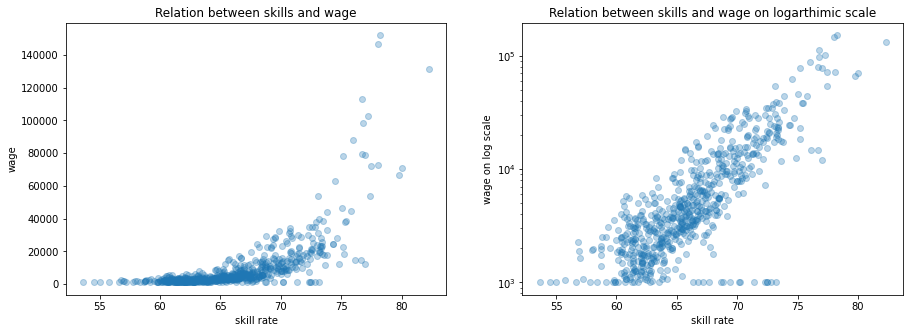

In [71]:
# Visualizing the relationship between wage and skill rate
plt.figure(figsize =[15, 5]);

#plot the scatter points between skill rate and wage on normal scale
plt.subplot(1,2, 1);
plt.scatter(data=clubs, x='overall', y='wage', alpha=0.3);
plt.title('Relation between skills and wage');
plt.ylabel('wage');
plt.xlabel('skill rate');

#plot the scatter points between skill rate and wage on log10 scale
plt.subplot(1,2, 2);
plt.scatter(data=clubs, x='overall', y='wage', alpha=0.3);
plt.yscale('log');
plt.title('Relation between skills and wage on logarthimic scale');
plt.ylabel('wage on log scale');
plt.xlabel('skill rate');

In [72]:
# adding new columns, mapping the wage on log10 scale
clubs['wage_log10'] = np.log10(clubs['wage'])

# add intercept for calculating slope on the linear regression model with statsmodels 
clubs['intercept'] = 1

clubs[['wage_log10', 'overall']].corr()

,wage_log10,overall
wage_log10,1.000000,0.809128
overall,0.809128,1.000000


In [73]:
# Fitting the model
lm = sm.OLS(clubs['wage_log10'], clubs[['intercept', 'overall']])
result = lm.fit()

# Extract summary statistics from model result
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             wage_log10   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     1230.
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          5.46e-152
Time:                        00:24:45   Log-Likelihood:                -71.389
No. Observations:                 651   AIC:                             146.8
Df Residuals:                     649   BIC:                             155.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.8704      0.159    -11.785      0.000      -2.182      -1.559
overall        0.0840      0.002     35.078      0.000       0.079       0.089
==============================================================================
Omnibus:                      150.315   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              496.216
Skew:                          -1.076   Prob(JB):                    1.77e-108
Kurtosis:                       6.696   Cond. No.                         992.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# making predication with the model
clubs['prediction_log'] = result.predict(clubs[['intercept', 'overall']])
clubs['prediction'] = 10 ** clubs['prediction_log']

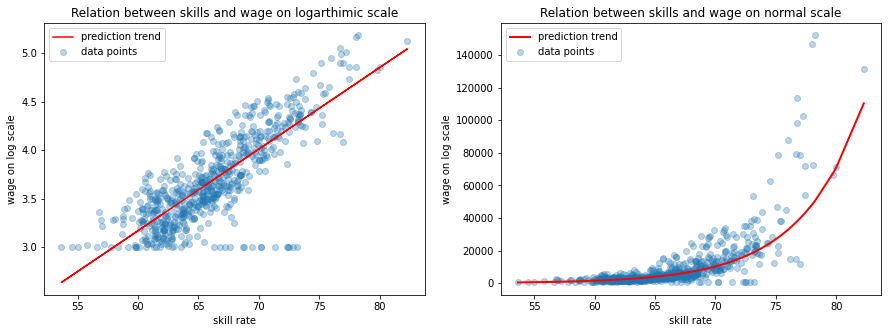

In [75]:
# Visualizing the model predication trend result 
plt.figure(figsize =[15, 5]);

plt.subplot(1,2, 1);
#plot the scatter points between skill rate and wage on log10 scale
plt.scatter(data=clubs, x='overall', y='wage_log10', alpha=0.3, label='data points');
plt.title('Relation between skills and wage on logarthimic scale');
plt.ylabel('wage on log scale');
plt.xlabel('skill rate');

#trend on log scale
plt.plot(clubs['overall'], clubs['prediction_log'], color='r', label='prediction trend');
plt.legend();

plt.subplot(1,2, 2);
#plot the scatter points between skill rate and wage on normal scale
plt.scatter(data=clubs, x='overall', y='wage', alpha=0.3, label='data points');
plt.title('Relation between skills and wage on normal scale');
plt.ylabel('wage on log scale');
plt.xlabel('skill rate');

#trend on normal scale
clubs2 = clubs.sort_values('prediction')
plt.plot(clubs2.overall, clubs2.prediction, color='r', lw=2, label='prediction trend')
plt.legend();

**Relationship between skill rate and players wages?**
>- We can see that there is an expontontial relationship between skills rate and player wages, which is transformed to a linear relationship between skills rate and the log10 of wage 
- there is a strong positive linear correlation at 81%
There is a significant relationship between skills and wages at  𝑃>|𝑡|  = 0.0000
- For every 1 unit of increase of player skill rating, there an increase of 0.0840 of log10 of the wage
- RSME of linear model is 0.30

In [76]:
clubs['rsme'] = np.sqrt(np.power(clubs['prediction_log'] - clubs['prediction_log'].mean(), 2))

rsme = clubs['rsme'].mean()

print(f'Root squares means error for the predication of log10 wages is {rsme: .2f}')

Root squares means error for the predication of log10 wages is  0.30


In [77]:
clubs.sort_values('overall', ascending=False).head()

,overall,wage,wage_log10,intercept,prediction_log,prediction,rsme
club,,,,,,,
Juventus,82.280000,131680.000000,5.119520,1,5.042525,110287.274748,1.358391
Napoli,80.000000,71080.000000,4.851747,1,4.850967,70952.356687,1.166833
Inter,79.750000,66500.000000,4.822822,1,4.829963,67602.474791,1.145828
Real Madrid,78.242424,152030.303030,5.181930,1,4.703301,50501.086457,1.019166
Milan,78.074074,72481.481481,4.860227,1,4.689156,48882.843260,1.005022


<a id='bestclub'></a>
## Research Question 2: Is there a dominant team which has the best combinations of players?

-  In an effort to identify the team with the best combination of players, we group the club by the avg skill rate and find out that `Juventus` and `Napoli` are the highest rated teams
- So we conduct a hypothesis test to check which team has the best combinations of players:

<br>

$Hypothesis:$



<center>
    $H_0: \mu_{J} = \mu_{N} $ <br><br>
    $H_1: \mu_{J} \neq \mu_{N} $ 
</center>

<br><br>
$J$ : Average skills rate for Juventus players<br>
$N$ : Average skills rate for Napoli players <br>
$\alpha$ = 5%
    
<br>
  
> After conducting 10k bootstrap samples we find $P$ of $\mu_{J} = \mu_{N}$ is at 49%, so at $\alpha$ = 5% <br> <center> <b>We Fail to Reject the Null Hypothesis </b> </center>

In [78]:
# Group the teams skills means
skl_rates = pd.DataFrame(df_new.groupby('club')['overall'].mean())
skl_rates.sort_values('overall', ascending=False).head(6)

,overall
club,
Juventus,82.280000
Napoli,80.000000
Inter,79.750000
Real Madrid,78.242424
Milan,78.074074
FC Barcelona,78.030303


In [79]:
# Calculating the difference between the top 2 times mean skills rating
dif = float(skl_rates.loc['Juventus'].values - skl_rates.loc['Napoli'].values)

dif

2.280000000000001

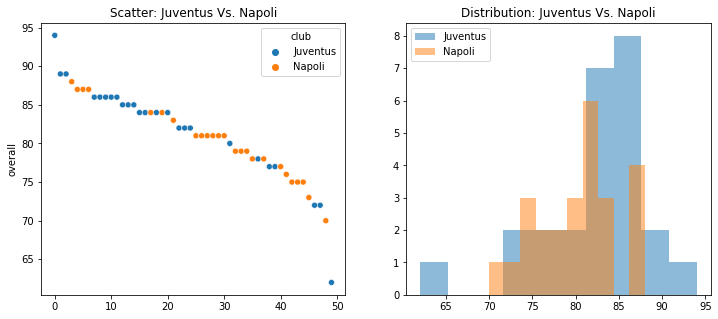

In [80]:
# Create new df for top 2 teams
top_clubs = df_new[(df_new['club'] == 'Napoli') | (df_new['club'] == 'Juventus')]

# Visualizing the distribution of top 2 teams
plt.figure(figsize=[12, 5]);
plt.subplot(1, 2, 1);
sns.scatterplot(x= np.arange(0, top_clubs.shape[0]) , y=top_clubs['overall'], hue=top_clubs['club']);
plt.title('Scatter: Juventus Vs. Napoli');

plt.subplot(1, 2, 2);
plt.hist(top_clubs['overall'][top_clubs['club'] == 'Juventus'], alpha=0.5, label = 'Juventus');
plt.hist(top_clubs['overall'][top_clubs['club'] == 'Napoli'], alpha=0.5, label = 'Napoli');
plt.title('Distribution: Juventus Vs. Napoli');
plt.legend();

In [81]:
# Hypothesis test for best combinations of players
juv_arr = np.empty(10000)
napo_arr = np.empty(10000)
diff_arr = np.empty(10000)


for i in range(10000):
    juv_samp = np.random.choice(top_clubs['overall'][top_clubs['club'] == 'Juventus'], 11)
    napo_samp = np.random.choice(top_clubs['overall'][top_clubs['club'] == 'Napoli'], 11)
    juv_arr[i] = juv_samp.mean()
    napo_arr[i] = napo_samp.mean()
    diff_arr[i] = juv_samp.mean() - napo_samp.mean()


0.4872

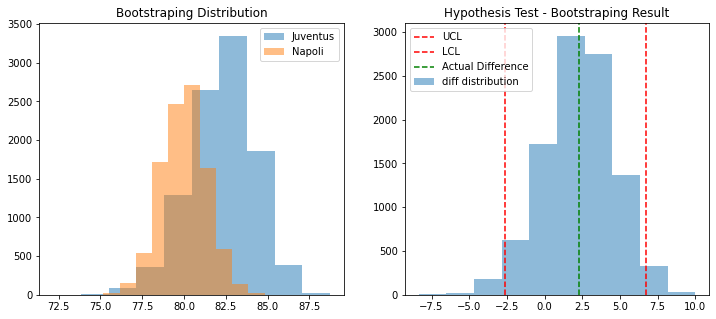

In [82]:
# Visualizing the Hypothesis test result
plt.figure(figsize=[12, 5]);
plt.subplot(1, 2, 1);
plt.title('Bootstraping Distribution')
plt.hist(juv_arr, alpha=0.5, label = 'Juventus');
plt.hist(napo_arr, alpha=0.5, label = 'Napoli');
plt.legend()


plt.subplot(1, 2, 2);
plt.hist(diff_arr, alpha=0.5, label = 'diff distribution');
plt.axvline(np.percentile(diff_arr, 97.5), color='red', ls='--', label = 'UCL');
plt.axvline(np.percentile(diff_arr, 2.5), color='red', ls='--', label = 'LCL');
plt.axvline(dif, color='green', ls='--', label = 'Actual Difference');
plt.legend()
plt.title('Hypothesis Test - Bootstraping Result')



(diff_arr < dif).sum() / 10000

**Result of the hypothesis test?**
> After conducting 10k bootstrap samples we find $P$ of $\mu_{J} = \mu_{N}$ is at 49%, so at $\alpha$ = 5% <br> <center> <b>We Fail to Reject the Null Hypothesis </b> </center>

<a id='segment'></a>
## Research Question 3: What is the best segmentation based on hierarchy of clubs and players?

- To estimate the best segmentations for players and teams using all the parameters on the data set, we conduct a test on the data by exhausting several n_clusters and measure the inertia and plot on chart and found out the best parameters is **4 clusters**

In [83]:
# Convert categorical variable body_type to numeric 
df_new[['type_lean', 'type_normal']]  = pd.get_dummies(df_new['body_type']).drop('stocky', axis = 1)

In [84]:
# Convert categorical variable position to numeric 
df_new[['position_back', 'position_front', 'position_midfield']]  = pd.get_dummies(df_new['position']).drop('goalkeeper', axis = 1)

In [85]:
# Drop categorical variable and keep only variables to be fed to ML clustering algorithm
df_clusters = df_new.drop(['id', 'name', 'nationality', 'club', 'body_type', 'position'], axis=1)

In [86]:
# Checking the final result of data preparation 
df_clusters.head()

,duration,loaned,wgt_kg,hgt_cm,age,right_ft,wk_rate,jersey,overall,potential,int_rept,weak_ft,skl_move,attack,skill,movement,power,mentality,defence,gk,midfield,back,front,wage,type_lean,type_normal,position_back,position_front,position_midfield
0,16.515068,0,72.121187,173.7360,31.0,0,4,10,94.0,94.0,100.0,80.0,80.0,85.0,93.4,91.6,75.6,71.500000,29.000000,10.8,81.20,58.875,90.875,565000.0,0,1,0,1,0
1,3.482192,0,83.007404,188.9760,33.0,1,3,7,94.0,94.0,100.0,80.0,100.0,87.0,83.2,86.6,90.0,74.833333,27.333333,11.6,78.50,61.500,90.125,405000.0,0,1,0,1,0
2,4.416438,0,68.038855,179.8320,26.0,1,5,10,92.0,93.0,100.0,100.0,100.0,79.2,88.8,91.6,70.6,73.833333,28.000000,11.8,78.50,59.000,87.125,290000.0,0,1,0,1,0
3,8.509589,0,76.203518,195.0720,27.0,1,4,1,91.0,93.0,80.0,60.0,20.0,22.8,30.2,61.6,43.4,42.666667,16.333333,88.8,80.18,67.375,83.500,260000.0,1,0,0,0,0
4,7.345205,0,69.853225,155.7528,27.0,1,6,7,91.0,92.0,80.0,100.0,80.0,80.8,87.2,80.2,82.0,80.833333,59.000000,11.2,84.50,73.125,85.125,355000.0,0,1,0,0,1


In [87]:
# Testing for best number of clusters based on elbow technique
n_clusts = np.arange(1, 10)
elbow_list = []
for i in n_clusts:
    club_model = KMeans(n_clusters = i)
    club_model.fit(df_clusters)
    elbow_list.append(club_model.inertia_)
    print(club_model.inertia_)

8784796577200.292
3756798737369.0522
1963548655936.975
1141676461278.8386
763863500279.9082
518912278873.1967
403302335824.22186
314620376410.7451
250637719383.272


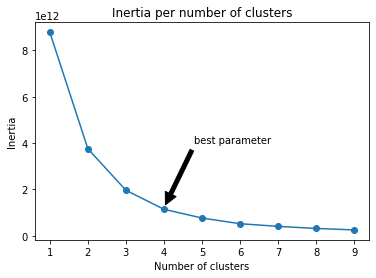

In [88]:
# Visualizing the result
plt.plot(n_clusts, elbow_list, marker='o');
plt.title('Inertia per number of clusters');
plt.annotate('best parameter', xy=(4, 1.2 * 10**12), xytext=(4.8, 4 * 10**12),
            arrowprops=dict(facecolor='black', shrink=0.05));
plt.ylabel('Inertia');
plt.xlabel('Number of clusters');

In [89]:
# Applying clustering algorithm
kmeans_model = KMeans(n_clusters = 4)
kmeans_model.fit(df_clusters)

kmeans_clusters = kmeans_model.predict(df_clusters)

In [90]:
# Attaching the clusters to dataframe
df_clusters['h_clusters'] = kmeans_clusters

In [91]:
# Result of clustering in numeric
avg_clusters = df_clusters.groupby('h_clusters')[['overall', 'wage', 'skl_move',
       'attack', 'skill', 'movement', 'power', 'mentality', 'defence']].mean()

avg_clusters

,overall,wage,skl_move,attack,skill,movement,power,mentality,defence
h_clusters,,,,,,,,,
0,64.662519,4187.661166,45.636926,48.185263,49.547112,62.819778,57.994959,50.570612,45.623281
1,88.018868,263867.924528,67.924528,71.600000,74.973585,77.966038,74.384906,71.050314,51.716981
2,75.325401,32707.625061,57.037397,59.830112,61.956872,68.963672,66.835551,61.904970,54.309050
3,81.721088,104789.115646,60.544218,64.123129,66.644898,72.272789,69.822449,66.949546,59.297052


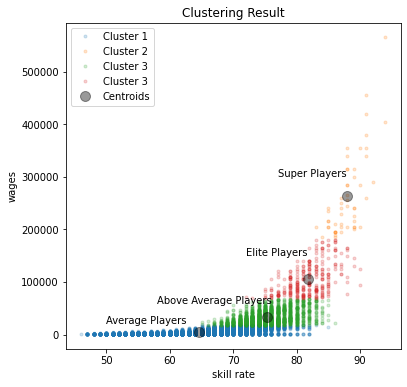

In [92]:
# Clustering visiualized
plt.figure(figsize=[6, 6]);

plt.plot(df_clusters['overall'][df_clusters['h_clusters']==0], df_clusters['wage'][df_clusters['h_clusters']==0], 
         marker='.', lw=0, alpha=0.2, label='Cluster 1');
plt.plot(df_clusters['overall'][df_clusters['h_clusters']==1], df_clusters['wage'][df_clusters['h_clusters']==1], 
         marker='.', lw=0, alpha=0.2, label='Cluster 2');
plt.plot(df_clusters['overall'][df_clusters['h_clusters']==2], df_clusters['wage'][df_clusters['h_clusters']==2], 
         marker='.', lw=0, alpha=0.2, label='Cluster 3');

plt.plot(df_clusters['overall'][df_clusters['h_clusters']==3], df_clusters['wage'][df_clusters['h_clusters']==3], 
         marker='.', lw=0, alpha=0.2, label='Cluster 3');


plt.plot(avg_clusters['overall'], avg_clusters['wage'], 
         c='k', marker='o', markersize=10, lw=0, label='Centroids', alpha=0.4)


plt.title('Clustering Result');
plt.xlabel('skill rate');
plt.ylabel('wages');
plt.legend();

plt.text(77, 300000, 'Super Players');
plt.text(72, 150000, 'Elite Players');
plt.text(58, 60000, 'Above Average Players');
plt.text(50, 21000, 'Average Players');
#plt.yscale('log')

**Best segmentation based on hierarchy of clubs and players?**
>Conducted a test on the data by exhausting several n_clusters and measure the inertia of each model parameters and reach a conclusion that the best parameters is 4 clusters

<a id='wage_predicaton'></a>
## Research Question 4: What is the predict wage per player considering all variables in the dataset? How accurate is the predication ?

In [93]:
# Converting clusters column to dummy variable
df_clusters[['cluster_1', 'cluster_2', 'cluster_3']] = pd.get_dummies(df_clusters['h_clusters']).drop(3, axis = 1)
df_numeric = df_clusters.drop('h_clusters', axis = 1)

In [94]:
# Split data into Training and testing
X = np.array(df_numeric.drop('wage',axis=1))
y = np.array(df_numeric['wage']) 
y = np.log10(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state= 0, shuffle = True)

In [95]:
# Training the model on training data and predicting on testing data
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('R2 Score is : {} | Root Mean Square Error is : {}'.format(r2,rmse))

R2 Score is : 0.7672698490039754 | Root Mean Square Error is : 0.2577753010016287


In [96]:
# Model coefficients
coefs = pd.DataFrame({'variable':df_numeric.drop('wage', axis=1).columns, 'coefficient':lr.coef_}
                    ).append({'variable': 'intercept', 'coefficient':lr.intercept_}, ignore_index=True).reset_index(drop=True)

coefs

,variable,coefficient
0,duration,-0.000361
1,loaned,0.190462
2,wgt_kg,-0.001668
3,hgt_cm,0.000223
4,age,0.000390
5,right_ft,-0.007210
6,wk_rate,-0.008726
7,jersey,0.000843
8,overall,0.038783
9,potential,0.002959


In [97]:
# comparing predication result to test value array
test = pd.DataFrame(y_test)
pred = pd.DataFrame(y_pred)
pred_compare = pd.concat([test, pred], axis =1)
pred_compare.columns = ['test_log', 'pred_log']
pred_compare = pred_compare.sort_values('pred_log')
pred_compare['test'] = 10 ** pred_compare['test_log']
pred_compare['pred'] = 10 ** pred_compare['pred_log']
#pred_compare['within_95_confidence'] = 



pred_compare.head()




pred_compare.head()

,test_log,pred_log,test,pred
4897,3.0,2.633960,1000.0,430.486543
3591,3.0,2.636251,1000.0,432.763490
2744,3.0,2.659490,1000.0,456.552210
1002,3.0,2.659603,1000.0,456.670492
4631,3.0,2.670722,1000.0,468.513425


In [98]:
ci = np.std(pred_compare['pred']) * 1.96
within_95 = []

for i, v in pred_compare.iterrows():
    if (v[2] >= v[3] - ci) and ((v[2] <= v[3] + ci)):
        within_95.append(1)
    else:
        within_95.append(0)
        


In [99]:
within_95_array = np.array(within_95)

print(f'Total observation in the test set is {len(within_95_array)}')
print(f'Number of correct predications within 95% confidence interval is {within_95_array.sum()}')
print(f'Number of wrong predications within 95% confidence interval is {len(within_95_array) - within_95_array.sum()}')
print(f'Predications accuracy is {within_95_array.sum() / len(within_95_array):0.3f}')

Total observation in the test set is 5376
Number of correct predications within 95% confidence interval is 5359
Number of wrong predications within 95% confidence interval is 17
Predications accuracy is 0.997


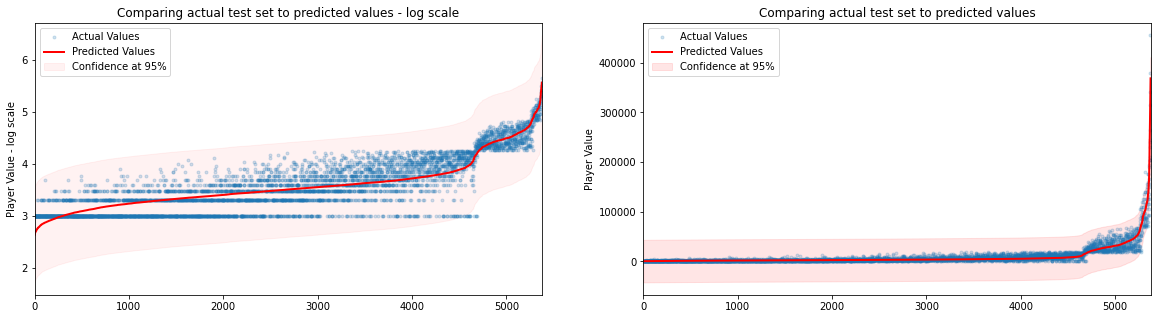

In [100]:
# visualizing the model predication result 

range_x = np.arange(1, pred_compare.shape[0]+1)
ci = np.std(pred_compare['pred'])*1.96
ci_log = np.std(pred_compare['pred_log'])*1.96

plt.figure(figsize=[20,5]);

plt.subplot(1, 2, 2);
plt.plot(range_x, pred_compare['test'], alpha=0.2, lw=0, marker='.', label = 'Actual Values');
plt.plot(range_x, pred_compare['pred'], lw=2, c='r', label = 'Predicted Values');
plt.fill_between(range_x, pred_compare['pred'] + ci, pred_compare['pred'] - ci,alpha = 0.1, color= 'red', label = 'Confidence at 95%');
plt.title('Comparing actual test set to predicted values')
plt.ylabel('Player Value')
plt.xlim([0, pred_compare.shape[0]]);
plt.legend(loc='upper left');

plt.subplot(1, 2, 1);
plt.plot(range_x, pred_compare['test_log'], alpha=0.2, lw=0, marker='.', label = 'Actual Values');
plt.plot(range_x, pred_compare['pred_log'], lw=2, c='r', label = 'Predicted Values');
plt.fill_between(range_x, pred_compare['pred_log'] + ci_log, pred_compare['pred_log'] - ci_log, 
                 alpha = 0.05, color= 'red', label = 'Confidence at 95%');
plt.title('Comparing actual test set to predicted values - log scale')
plt.ylabel('Player Value - log scale')
plt.xlim([0, pred_compare.shape[0]]);
plt.legend(loc='upper left');


**How good is the linear regression model prediction result?**

>After applying the linear regression model, we were able to predict the wages of the a test dataset at 95% confidence interval with accuracy 99.7%, with only 17 incorrect predication out of +5.3K predications

<a id='conclusion'></a>
## Conclusion


- From intial exploration to the datset we find out that are very strong multicolinearity between variables in the dataset, thus to fix the issue and make the dataset more legable and comperhandable will be trimming and engineering the feature and reduce dimensionality from 89 dimension to 29 dimension
- In regard to relationship between players skill rate and wages we find out that there a significant exponential relationship between the variables with 81% correlation between players skill rate and log<sub>10</sub> of players wages
- In regard to the idea of having a dominant team, after conduting a hypothesis testing on the top 2 team with highest average players skill rate, we concluded that there is no one team which has a siginificance dominance when it comes to players skills
- To better understand the types of players and football players in the dataset we applied ML clustering algorithm KMeans and after conducting exhaustive test on the right number of clusters in the dataset we found out that there are 4 segements in the data, we can call them as follow (Super players - Elite players - Above average players - Average players)
- To estimate the players wage based on available variable, we have applied linear regression model and were able to predict the wages of the a test dataset at 95% confidence interval with accuracy 99.7%, with only 17 incorrect predication out of  +5.3K predications

In [102]:
! jupyter nbconvert fifa-2019 --to slides --template output-toggle.tpl #--post serve

[NbConvertApp] Converting notebook fifa-2019.ipynb to slides
[NbConvertApp] Writing 3769455 bytes to fifa-2019.slides.html


In [1]:
! jupyter nbconvert fifa-2019 --to html

[NbConvertApp] Converting notebook fifa-2019.ipynb to html
[NbConvertApp] Writing 3995631 bytes to fifa-2019.html
